# Machine Learning Techniques for Sales Forecasting

## Importing Libraries

In [2]:
%pip install xgboost
%pip install statsmodels
%pip install pandas numpy statsmodels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import panel as pn
pn.extension()
import hvplot.pandas
from statsmodels.tsa.stattools import adfuller


## Importing Datasets & Read all csv files

01. item_categories.csv - 
    item_category_name, 
    item_category_id

02. items.csv - 
    item_name, 
    item_id, 
    category_id

03. sales_train.csv - 
    date, 
    date_block_num, 
    shop_id, 
    item_id, 
    item_price, 
    item_cnt_day

04. shops.csv - 
    shop_name, 
    shop_id

05. test.csv - 
    ID, 
    shop_id, 
    item_id

In [4]:
#importing data
item_categories = pd.read_csv('./data-set/item_categories.csv')
items = pd.read_csv('./data-set/items.csv')
sales_train = pd.read_csv('./data-set/sales_train.csv')
shops = pd.read_csv('./data-set/shops.csv')
test = pd.read_csv('./data-set/test.csv')

In [5]:
#checking the shape of the data
print("Shape of item_categories:", item_categories.shape)
print("Shape of items:", items.shape)
print("Shape of sales_train:", sales_train.shape)
print("Shape of shops:", shops.shape)
print("Shape of test:", test.shape)

Shape of item_categories: (84, 2)
Shape of items: (22170, 3)
Shape of sales_train: (2935849, 6)
Shape of shops: (60, 2)
Shape of test: (214200, 3)


In [6]:
#checking the columns of the data
print("\n\nColumns of item_categories:\n")
print(item_categories.info())

print("-----------------------------------------------------")

print("\n\nColumns of items:\n")
print(items.info())

print("-----------------------------------------------------")

print("\n\nColumns of sales_train:\n")
print(sales_train.info())

print("-----------------------------------------------------")

print("\n\nColumns of shops:\n")
print(shops.info())

print("-----------------------------------------------------")

print("\n\nColumns of test:\n")
print(test.info())




Columns of item_categories:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
-----------------------------------------------------


Columns of items:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_name    22170 non-null  object
 1   item_id      22170 non-null  int64 
 2   category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
-----------------------------------------------------


Columns of sales_train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (

In [7]:
#checking the head and tail of the data

print("\n\nHead of item_categories:\n")
print(item_categories.head())

print("\n\nTail of item_categories:\n")
print(item_categories.tail())

print("-----------------------------------------------------")

print("\n\nHead of items:\n")
print(items.head())

print("\n\nTail of items:\n")
print(items.tail())

print("-----------------------------------------------------")

print("\n\nHead of sales_train:\n")
print(sales_train.head())

print("\n\nTail of sales_train:\n")
print(sales_train.tail())

print("-----------------------------------------------------")

print("\n\nHead of shops:\n")
print(shops.head())

print("\n\nTail of shops:\n")
print(shops.tail())

print("-----------------------------------------------------")

print("\n\nHead of test:\n")
print(test.head())

print("\n\nTail of test:\n")
print(test.tail())



Head of item_categories:

           item_category_name  item_category_id
0  PC - Headsets / Headphones                 0
1           Accessories - PS2                 1
2           Accessories - PS3                 2
3           Accessories - PS4                 3
4           Accessories - PSP                 4


Tail of item_categories:

       item_category_name  item_category_id
79                Service                79
80      Service - Tickets                80
81    Blank media (spire)                81
82   Blank media (piece)                 82
83              Batteries                83
-----------------------------------------------------


Head of items:

                                           item_name  item_id  category_id
0             !! IN THE POWER OF HAPPINESS (PLAST) D        0           40
1  ! ABBYY FineReader 12 Professional Edition Ful...        1           76
2              *** IN THE GLORY OF THE GLORY (UNV) D        2           40
3                   

## Data Preprocessing & Feature Engineering

In [8]:
#merging the data for better understand the data

In [9]:
#Merge sales_train.csv with items.csv on the "item_id" column
sales_with_items = sales_train.merge(items, on='item_id', how='left')
print("\n\nHead of sales_with_items:\n")
print(sales_with_items.head(20))
print(sales_with_items.shape)



Head of sales_with_items:

          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   02.01.2013               0       59    22154      999.00           1.0   
1   03.01.2013               0       25     2552      899.00           1.0   
2   05.01.2013               0       25     2552      899.00          -1.0   
3   06.01.2013               0       25     2554     1709.05           1.0   
4   15.01.2013               0       25     2555     1099.00           1.0   
5   10.01.2013               0       25     2564      349.00           1.0   
6   02.01.2013               0       25     2565      549.00           1.0   
7   04.01.2013               0       25     2572      239.00           1.0   
8   11.01.2013               0       25     2572      299.00           1.0   
9   03.01.2013               0       25     2573      299.00           3.0   
10  03.01.2013               0       25     2574      399.00           2.0   
11  05.01.2013               0     

In [10]:
#Merge the result with item_categories.csv on the "category_id" 
sales_with_items_and_categories = sales_with_items.merge(item_categories, right_on='item_category_id', left_on='category_id', how='left')
print("\n\nHead of sales_with_items_and_categories:\n")
print(sales_with_items_and_categories.head(20))
print(sales_with_items_and_categories.shape)



Head of sales_with_items_and_categories:

          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   02.01.2013               0       59    22154      999.00           1.0   
1   03.01.2013               0       25     2552      899.00           1.0   
2   05.01.2013               0       25     2552      899.00          -1.0   
3   06.01.2013               0       25     2554     1709.05           1.0   
4   15.01.2013               0       25     2555     1099.00           1.0   
5   10.01.2013               0       25     2564      349.00           1.0   
6   02.01.2013               0       25     2565      549.00           1.0   
7   04.01.2013               0       25     2572      239.00           1.0   
8   11.01.2013               0       25     2572      299.00           1.0   
9   03.01.2013               0       25     2573      299.00           3.0   
10  03.01.2013               0       25     2574      399.00           2.0   
11  05.01.2013      

In [11]:
# Check if the two columns are the same
if sales_with_items_and_categories['item_category_id'].equals(sales_with_items_and_categories['category_id']):
    # If they are the same, drop one of the columns
    sales_with_items_and_categories.drop(columns=['item_category_id'], inplace=True)


In [12]:
print("\n\nHead of sales_with_items_and_categories:\n")
print(sales_with_items_and_categories.head(20))
print(sales_with_items_and_categories.shape)



Head of sales_with_items_and_categories:

          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   02.01.2013               0       59    22154      999.00           1.0   
1   03.01.2013               0       25     2552      899.00           1.0   
2   05.01.2013               0       25     2552      899.00          -1.0   
3   06.01.2013               0       25     2554     1709.05           1.0   
4   15.01.2013               0       25     2555     1099.00           1.0   
5   10.01.2013               0       25     2564      349.00           1.0   
6   02.01.2013               0       25     2565      549.00           1.0   
7   04.01.2013               0       25     2572      239.00           1.0   
8   11.01.2013               0       25     2572      299.00           1.0   
9   03.01.2013               0       25     2573      299.00           3.0   
10  03.01.2013               0       25     2574      399.00           2.0   
11  05.01.2013      

In [13]:
#Merge the result with shops.csv on the "shop_id" 
final_dataset = sales_with_items_and_categories.merge(shops, on='shop_id', how='left')
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0   02.01.2013               0       59    22154      999.00           1.0   
1   03.01.2013               0       25     2552      899.00           1.0   
2   05.01.2013               0       25     2552      899.00          -1.0   
3   06.01.2013               0       25     2554     1709.05           1.0   
4   15.01.2013               0       25     2555     1099.00           1.0   
5   10.01.2013               0       25     2564      349.00           1.0   
6   02.01.2013               0       25     2565      549.00           1.0   
7   04.01.2013               0       25     2572      239.00           1.0   
8   11.01.2013               0       25     2572      299.00           1.0   
9   03.01.2013               0       25     2573      299.00           3.0   
10  03.01.2013               0       25     2574      399.00           2.0   
11  05.01.2013               0       2

In [14]:
#checks the columns of the final dataset
print("\n\nColumns of final_dataset:\n")
print(final_dataset.info())



Columns of final_dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   category_id         int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB
None


In [15]:
#prints the date and date_block_num column to check whether they are related
columns_to_print = ['date', 'date_block_num']
print(final_dataset[columns_to_print])

               date  date_block_num
0        02.01.2013               0
1        03.01.2013               0
2        05.01.2013               0
3        06.01.2013               0
4        15.01.2013               0
...             ...             ...
2935844  10.10.2015              33
2935845  09.10.2015              33
2935846  14.10.2015              33
2935847  22.10.2015              33
2935848  03.10.2015              33

[2935849 rows x 2 columns]


In [16]:
# Rename the column
final_dataset.rename(columns={'date_block_num': 'month_num'}, inplace=True)

In [17]:
#Rename the column
final_dataset.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

In [18]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00             1.0   
1   03.01.2013          0       25     2552      899.00             1.0   
2   05.01.2013          0       25     2552      899.00            -1.0   
3   06.01.2013          0       25     2554     1709.05             1.0   
4   15.01.2013          0       25     2555     1099.00             1.0   
5   10.01.2013          0       25     2564      349.00             1.0   
6   02.01.2013          0       25     2565      549.00             1.0   
7   04.01.2013          0       25     2572      239.00             1.0   
8   11.01.2013          0       25     2572      299.00             1.0   
9   03.01.2013          0       25     2573      299.00             3.0   
10  03.01.2013          0       25     2574      399.00             2.0   
11  05.01.2013          0       25     2574      399.00             1.0   

In [19]:
#checks the columns of the final dataset
print("\n\nColumns of final_dataset:\n")
print(final_dataset.info())



Columns of final_dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   month_num           int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_month      float64
 6   item_name           object 
 7   category_id         int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB
None


In [20]:
#export the final dataset to csv file
final_dataset.to_csv('./data-set/output/final_dataset_without_cleaning.csv', index=False)

In [21]:
#Data Cleaning

#checking for missing values
print("\n\nMissing values in final_dataset:\n")
print(final_dataset.isnull().sum())



Missing values in final_dataset:

date                  0
month_num             0
shop_id               0
item_id               0
item_price            0
item_cnt_month        0
item_name             0
category_id           0
item_category_name    0
shop_name             0
dtype: int64


In [22]:
#checking for null values
print("\n\nNull values in final_dataset:\n")
print(final_dataset.isnull().sum())



Null values in final_dataset:

date                  0
month_num             0
shop_id               0
item_id               0
item_price            0
item_cnt_month        0
item_name             0
category_id           0
item_category_name    0
shop_name             0
dtype: int64


In [23]:
print(final_dataset.shape)

(2935849, 10)


In [24]:
#handles the missing values in final_dataset
final_dataset['item_name'].fillna('Unknown', inplace=True)
final_dataset['item_category_name'].fillna('Unknown', inplace=True)

In [25]:
print(final_dataset.shape)

(2935849, 10)


In [26]:
#removes duplicates rows in final_dataset
final_dataset.drop_duplicates(inplace=True)


In [27]:
print(final_dataset.shape)

(2935843, 10)


In [28]:
#checks and solves the data type of the columns
print("\n\nData types of final_dataset:\n")
print(final_dataset.dtypes)




Data types of final_dataset:

date                   object
month_num               int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_month        float64
item_name              object
category_id             int64
item_category_name     object
shop_name              object
dtype: object


In [29]:
# #seems like item_cnt_month should be int64
final_dataset['item_cnt_month'] = final_dataset['item_cnt_month'].astype('int64')

In [30]:
print(final_dataset.dtypes)

date                   object
month_num               int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_month          int64
item_name              object
category_id             int64
item_category_name     object
shop_name              object
dtype: object


In [31]:
#prints item_cnt_month column to check whether it is int64
print(final_dataset['item_cnt_month'].head(30))   

0     1
1     1
2    -1
3     1
4     1
5     1
6     1
7     1
8     1
9     3
10    2
11    1
12    1
13    2
14    1
15    2
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: item_cnt_month, dtype: int64


In [32]:
print(final_dataset.shape)

(2935843, 10)


In [33]:
#removes -1 and 307980 from item_cnt_month column because it is an outlier
#it is not possible to sell -1 and 307980 items in a day because 307980 is the total number of items sold in a day
#which means that the data is incorrect
#and -1 is not possible

final_dataset = final_dataset[(final_dataset['item_cnt_month'] > 0) & (final_dataset['item_cnt_month'] < 307980)]

print(final_dataset.shape)

(2928487, 10)


In [34]:
#outlier treatment

#checks for outliers in the item_cnt_month column
print("\n\nOutliers in item_cnt_month column:\n")
print(final_dataset[final_dataset['item_cnt_month'] > 1000])

#removes the outliers in the item_cnt_month column
final_dataset = final_dataset[final_dataset['item_cnt_month'] < 1000]

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Outliers in item_cnt_month column:

               date  month_num  shop_id  item_id  item_price  item_cnt_month  \
2909818  28.10.2015         33       12    11373    0.908714            2169   

                                         item_name  category_id  \
2909818  Delivery to the point of issue (Boxberry)            9   

         item_category_name                               shop_name  
2909818   Delivery of goods   Internet-shop of emergency situations  




Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00               1   
1   03.01.2013          0       25     2552      899.00               1   
3   06.01.2013          0       25     2554     1709.05               1   
4   15.01.2013          0       25     2555     1099.00               1   
5   10.01.2013          0       25     2564      349.00               1   
6   02.01.2013          0       25     2565      549.00               1   
7   04.01.2013          0       25     2572      239.00               1   
8   11.01.2013          0       25     2572      299.00               1   
9   03.01.2013          0       25     2573      299.00               3   
10  03.01.2013          0       25     2574      399.00               2   
11  05.01.2013          0       25     2574      399.00               1   
12  07.01.2013          0       25     2574      399.00               1   

In [35]:
#deal with the incorrect data in the item_price column
#the item_price should not be negative
#the item_price should not be zero
#the item_price should not be greater than 100000

final_dataset = final_dataset[(final_dataset['item_price'] > 0) & (final_dataset['item_price'] < 100000)]

In [36]:
print(final_dataset.shape)

(2928483, 10)


In [37]:
#handles special characters and formatting in the data set
final_dataset['item_name'] = final_dataset['item_name'].str.replace('[^A-Za-z0-9А-Яа-я]+', ' ')

In [38]:
print(final_dataset.shape)

(2928483, 10)


In [39]:
#removes the noise in the item_name column
final_dataset['item_name'] = final_dataset['item_name'].str.replace('  ', ' ')

In [40]:
print(final_dataset.head())

         date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0  02.01.2013          0       59    22154      999.00               1   
1  03.01.2013          0       25     2552      899.00               1   
3  06.01.2013          0       25     2554     1709.05               1   
4  15.01.2013          0       25     2555     1099.00               1   
5  10.01.2013          0       25     2564      349.00               1   

                                           item_name  category_id  \
0                                    SCENE 2012 (BD)           37   
1             DEEP PURPLE The House Of Blue Light LP           58   
3             DEEP PURPLE Who Do You Think We Are LP           58   
4      DEEP PURPLE 30 Very Best Of 2CD (Businesses).           56   
5  DEEP PURPLE Perihelion: Live In Concert DVD (C...           59   

                    item_category_name                shop_name  
0                     Cinema - Blu-Ray   Yaroslavl TC" Altair "  
1       

In [41]:
#creates a new column called revenue
final_dataset['revenue'] = final_dataset['item_cnt_month'] * final_dataset['item_price']


In [42]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00               1   
1   03.01.2013          0       25     2552      899.00               1   
3   06.01.2013          0       25     2554     1709.05               1   
4   15.01.2013          0       25     2555     1099.00               1   
5   10.01.2013          0       25     2564      349.00               1   
6   02.01.2013          0       25     2565      549.00               1   
7   04.01.2013          0       25     2572      239.00               1   
8   11.01.2013          0       25     2572      299.00               1   
9   03.01.2013          0       25     2573      299.00               3   
10  03.01.2013          0       25     2574      399.00               2   
11  05.01.2013          0       25     2574      399.00               1   
12  07.01.2013          0       25     2574      399.00               1   

In [43]:
#creates a new column called revenue_per_item
final_dataset['revenue_per_item'] = final_dataset['revenue'] / final_dataset['item_cnt_month']


print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00               1   
1   03.01.2013          0       25     2552      899.00               1   
3   06.01.2013          0       25     2554     1709.05               1   
4   15.01.2013          0       25     2555     1099.00               1   
5   10.01.2013          0       25     2564      349.00               1   
6   02.01.2013          0       25     2565      549.00               1   
7   04.01.2013          0       25     2572      239.00               1   
8   11.01.2013          0       25     2572      299.00               1   
9   03.01.2013          0       25     2573      299.00               3   
10  03.01.2013          0       25     2574      399.00               2   
11  05.01.2013          0       25     2574      399.00               1   
12  07.01.2013          0       25     2574      399.00               1   

In [44]:
#checks whether the revenue_per_item column and revenue column are the same

if final_dataset['revenue_per_item'].equals(final_dataset['revenue']):
    # If they are the same, drop one of the columns
    final_dataset.drop(columns=['revenue_per_item'], inplace=True)

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00               1   
1   03.01.2013          0       25     2552      899.00               1   
3   06.01.2013          0       25     2554     1709.05               1   
4   15.01.2013          0       25     2555     1099.00               1   
5   10.01.2013          0       25     2564      349.00               1   
6   02.01.2013          0       25     2565      549.00               1   
7   04.01.2013          0       25     2572      239.00               1   
8   11.01.2013          0       25     2572      299.00               1   
9   03.01.2013          0       25     2573      299.00               3   
10  03.01.2013          0       25     2574      399.00               2   
11  05.01.2013          0       25     2574      399.00               1   
12  07.01.2013          0       25     2574      399.00               1   

In [45]:
#creates a new column called date num
final_dataset['date_num'] = final_dataset['date'].str[:2]

In [46]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00               1   
1   03.01.2013          0       25     2552      899.00               1   
3   06.01.2013          0       25     2554     1709.05               1   
4   15.01.2013          0       25     2555     1099.00               1   
5   10.01.2013          0       25     2564      349.00               1   
6   02.01.2013          0       25     2565      549.00               1   
7   04.01.2013          0       25     2572      239.00               1   
8   11.01.2013          0       25     2572      299.00               1   
9   03.01.2013          0       25     2573      299.00               3   
10  03.01.2013          0       25     2574      399.00               2   
11  05.01.2013          0       25     2574      399.00               1   
12  07.01.2013          0       25     2574      399.00               1   

In [47]:
#creates a new column called year num
final_dataset['year_num'] = final_dataset['date'].str[6:]

In [48]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date  month_num  shop_id  item_id  item_price  item_cnt_month  \
0   02.01.2013          0       59    22154      999.00               1   
1   03.01.2013          0       25     2552      899.00               1   
3   06.01.2013          0       25     2554     1709.05               1   
4   15.01.2013          0       25     2555     1099.00               1   
5   10.01.2013          0       25     2564      349.00               1   
6   02.01.2013          0       25     2565      549.00               1   
7   04.01.2013          0       25     2572      239.00               1   
8   11.01.2013          0       25     2572      299.00               1   
9   03.01.2013          0       25     2573      299.00               3   
10  03.01.2013          0       25     2574      399.00               2   
11  05.01.2013          0       25     2574      399.00               1   
12  07.01.2013          0       25     2574      399.00               1   

In [49]:
print(final_dataset.shape)
print(final_dataset.info())

(2928483, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 2928483 entries, 0 to 2935848
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   month_num           int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_month      int64  
 6   item_name           object 
 7   category_id         int64  
 8   item_category_name  object 
 9   shop_name           object 
 10  revenue             float64
 11  revenue_per_item    float64
 12  date_num            object 
 13  year_num            object 
dtypes: float64(3), int64(5), object(6)
memory usage: 335.1+ MB
None


In [50]:
# rearrange the columns
final_dataset = final_dataset[['date', 'date_num', 'year_num', 'month_num', 'shop_id', 'shop_name', 'item_id', 'item_name', 'category_id', 'item_category_name', 'item_price', 'item_cnt_month', 'revenue']]

print(final_dataset.shape)
print(final_dataset.info())

(2928483, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 2928483 entries, 0 to 2935848
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_num            object 
 2   year_num            object 
 3   month_num           int64  
 4   shop_id             int64  
 5   shop_name           object 
 6   item_id             int64  
 7   item_name           object 
 8   category_id         int64  
 9   item_category_name  object 
 10  item_price          float64
 11  item_cnt_month      int64  
 12  revenue             float64
dtypes: float64(2), int64(5), object(6)
memory usage: 312.8+ MB
None


In [51]:
#data profiling

#descriptive statistics
print("\n\nDescriptive statistics of final_dataset:\n")
print(final_dataset.describe())



Descriptive statistics of final_dataset:

          month_num       shop_id       item_id   category_id    item_price  \
count  2.928483e+06  2.928483e+06  2.928483e+06  2.928483e+06  2.928483e+06   
mean   1.456976e+01  3.300296e+01  1.020028e+04  4.001637e+01  8.893627e+02   
std    9.422952e+00  1.622543e+01  6.324391e+03  1.709809e+01  1.718155e+03   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  7.000000e-02   
25%    7.000000e+00  2.200000e+01  4.477000e+03  2.800000e+01  2.490000e+02   
50%    1.400000e+01  3.100000e+01  9.355000e+03  4.000000e+01  3.990000e+02   
75%    2.300000e+01  4.700000e+01  1.569100e+04  5.500000e+01  9.990000e+02   
max    3.300000e+01  5.900000e+01  2.216900e+04  8.300000e+01  5.920000e+04   

       item_cnt_month       revenue  
count    2.928483e+06  2.928483e+06  
mean     1.247257e+00  1.164267e+03  
std      2.217429e+00  5.684853e+03  
min      1.000000e+00  7.000000e-02  
25%      1.000000e+00  2.490000e+02  
50%      1.00000

In [52]:
#data enrichment

#creates a new column called month name
final_dataset['month_name'] = final_dataset['month_num'].replace({0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July', 7: 'August', 8: 'September', 9: 'October', 10: 'November', 11: 'December', 12: 'January', 13: 'February', 14: 'March', 15: 'April', 16: 'May', 17: 'June', 18: 'July', 19: 'August', 20: 'September', 21: 'October', 22: 'November', 23: 'December', 24: 'January', 25: 'February', 26: 'March', 27: 'April', 28: 'May', 29: 'June', 30: 'July', 31: 'August', 32: 'September', 33: 'October'})

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num year_num  month_num  shop_id                shop_name  \
0   02.01.2013       02     2013          0       59   Yaroslavl TC" Altair "   
1   03.01.2013       03     2013          0       25     Moscow TEC" Atrium "   
3   06.01.2013       06     2013          0       25     Moscow TEC" Atrium "   
4   15.01.2013       15     2013          0       25     Moscow TEC" Atrium "   
5   10.01.2013       10     2013          0       25     Moscow TEC" Atrium "   
6   02.01.2013       02     2013          0       25     Moscow TEC" Atrium "   
7   04.01.2013       04     2013          0       25     Moscow TEC" Atrium "   
8   11.01.2013       11     2013          0       25     Moscow TEC" Atrium "   
9   03.01.2013       03     2013          0       25     Moscow TEC" Atrium "   
10  03.01.2013       03     2013          0       25     Moscow TEC" Atrium "   
11  05.01.2013       05     2013          0       25     Moscow TEC" Atrium "   
12

In [53]:
#removes month_num column

final_dataset.drop(columns=['month_num'], inplace=True)

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num year_num  shop_id                shop_name  item_id  \
0   02.01.2013       02     2013       59   Yaroslavl TC" Altair "    22154   
1   03.01.2013       03     2013       25     Moscow TEC" Atrium "     2552   
3   06.01.2013       06     2013       25     Moscow TEC" Atrium "     2554   
4   15.01.2013       15     2013       25     Moscow TEC" Atrium "     2555   
5   10.01.2013       10     2013       25     Moscow TEC" Atrium "     2564   
6   02.01.2013       02     2013       25     Moscow TEC" Atrium "     2565   
7   04.01.2013       04     2013       25     Moscow TEC" Atrium "     2572   
8   11.01.2013       11     2013       25     Moscow TEC" Atrium "     2572   
9   03.01.2013       03     2013       25     Moscow TEC" Atrium "     2573   
10  03.01.2013       03     2013       25     Moscow TEC" Atrium "     2574   
11  05.01.2013       05     2013       25     Moscow TEC" Atrium "     2574   
12  07.01.2013       07   

In [54]:
#rearange the columns

final_dataset = final_dataset[['date', 'date_num', 'month_name', 'year_num', 'shop_id', 'shop_name', 'item_id', 'item_name', 'category_id', 'item_category_name', 'item_price', 'item_cnt_month', 'revenue']]

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num month_name year_num  shop_id                shop_name  \
0   02.01.2013       02    January     2013       59   Yaroslavl TC" Altair "   
1   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
3   06.01.2013       06    January     2013       25     Moscow TEC" Atrium "   
4   15.01.2013       15    January     2013       25     Moscow TEC" Atrium "   
5   10.01.2013       10    January     2013       25     Moscow TEC" Atrium "   
6   02.01.2013       02    January     2013       25     Moscow TEC" Atrium "   
7   04.01.2013       04    January     2013       25     Moscow TEC" Atrium "   
8   11.01.2013       11    January     2013       25     Moscow TEC" Atrium "   
9   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
10  03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
11  05.01.2013       05    January     2013       25     Moscow TEC" Atrium "   
12

In [55]:
#data binning

#found the bins using the following code
print(final_dataset['item_price'].max())
print(final_dataset['item_price'].min())

#creates a new column called price range
final_dataset['price_range'] = pd.cut(final_dataset['item_price'], bins=[-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 100000], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-100000'])

59200.0
0.07


In [56]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num month_name year_num  shop_id                shop_name  \
0   02.01.2013       02    January     2013       59   Yaroslavl TC" Altair "   
1   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
3   06.01.2013       06    January     2013       25     Moscow TEC" Atrium "   
4   15.01.2013       15    January     2013       25     Moscow TEC" Atrium "   
5   10.01.2013       10    January     2013       25     Moscow TEC" Atrium "   
6   02.01.2013       02    January     2013       25     Moscow TEC" Atrium "   
7   04.01.2013       04    January     2013       25     Moscow TEC" Atrium "   
8   11.01.2013       11    January     2013       25     Moscow TEC" Atrium "   
9   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
10  03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
11  05.01.2013       05    January     2013       25     Moscow TEC" Atrium "   
12

In [57]:
#log transformation

#creates a new column called log_revenue
final_dataset['log_revenue'] = np.log(final_dataset['revenue'])

In [58]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num month_name year_num  shop_id                shop_name  \
0   02.01.2013       02    January     2013       59   Yaroslavl TC" Altair "   
1   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
3   06.01.2013       06    January     2013       25     Moscow TEC" Atrium "   
4   15.01.2013       15    January     2013       25     Moscow TEC" Atrium "   
5   10.01.2013       10    January     2013       25     Moscow TEC" Atrium "   
6   02.01.2013       02    January     2013       25     Moscow TEC" Atrium "   
7   04.01.2013       04    January     2013       25     Moscow TEC" Atrium "   
8   11.01.2013       11    January     2013       25     Moscow TEC" Atrium "   
9   03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
10  03.01.2013       03    January     2013       25     Moscow TEC" Atrium "   
11  05.01.2013       05    January     2013       25     Moscow TEC" Atrium "   
12

In [59]:
#encoding

#encodes the year_num column to 0, 1, 2

final_dataset['year_num'] = final_dataset['year_num'].replace({'2013': 0, '2014': 1, '2015': 2})


print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)




Head of final_dataset:

          date date_num month_name  year_num  shop_id  \
0   02.01.2013       02    January         0       59   
1   03.01.2013       03    January         0       25   
3   06.01.2013       06    January         0       25   
4   15.01.2013       15    January         0       25   
5   10.01.2013       10    January         0       25   
6   02.01.2013       02    January         0       25   
7   04.01.2013       04    January         0       25   
8   11.01.2013       11    January         0       25   
9   03.01.2013       03    January         0       25   
10  03.01.2013       03    January         0       25   
11  05.01.2013       05    January         0       25   
12  07.01.2013       07    January         0       25   
13  08.01.2013       08    January         0       25   
14  10.01.2013       10    January         0       25   
15  11.01.2013       11    January         0       25   
16  13.01.2013       13    January         0       25   
17  1

In [60]:
#grouping and aggregation

#grouping the data set by shop_id and year_num and aggregating the item_cnt_month column using sum

grouped_by_shop_id_and_year_num = final_dataset.groupby(['shop_id', 'year_num']).agg({'item_cnt_month': 'sum'})

print("\n\nHead of grouped_by_shop_id_and_year_num:\n")
print(grouped_by_shop_id_and_year_num.head(60))
print(grouped_by_shop_id_and_year_num.shape)



Head of grouped_by_shop_id_and_year_num:

                  item_cnt_month
shop_id year_num                
0       0                  11705
1       0                   6311
2       0                   9989
        1                  12247
        2                   8470
3       0                  10242
        1                  11039
        2                   7194
4       0                  19054
        1                  15909
        2                   9106
5       0                  14717
        1                  17041
        2                  11089
6       0                  46707
        1                  35496
        2                  18554
7       0                  28218
        1                  24530
        2                  14411
8       0                   3602
9       0                   6531
        1                   6155
        2                   3188
10      0                  11132
        1                   8859
        2                   4532

In [61]:
#creates a new column called scaled_revenue
final_dataset['scaled_revenue'] = (final_dataset['revenue'] - final_dataset['revenue'].min()) / (final_dataset['revenue'].max() - final_dataset['revenue'].min())

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)





Head of final_dataset:

          date date_num month_name  year_num  shop_id  \
0   02.01.2013       02    January         0       59   
1   03.01.2013       03    January         0       25   
3   06.01.2013       06    January         0       25   
4   15.01.2013       15    January         0       25   
5   10.01.2013       10    January         0       25   
6   02.01.2013       02    January         0       25   
7   04.01.2013       04    January         0       25   
8   11.01.2013       11    January         0       25   
9   03.01.2013       03    January         0       25   
10  03.01.2013       03    January         0       25   
11  05.01.2013       05    January         0       25   
12  07.01.2013       07    January         0       25   
13  08.01.2013       08    January         0       25   
14  10.01.2013       10    January         0       25   
15  11.01.2013       11    January         0       25   
16  13.01.2013       13    January         0       25   
17  1

In [62]:
#change month_name column to numeric

final_dataset['month_name'] = final_dataset['month_name'].replace({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June':6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November':11, 'December': 12})

print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)



Head of final_dataset:

          date date_num  month_name  year_num  shop_id  \
0   02.01.2013       02           1         0       59   
1   03.01.2013       03           1         0       25   
3   06.01.2013       06           1         0       25   
4   15.01.2013       15           1         0       25   
5   10.01.2013       10           1         0       25   
6   02.01.2013       02           1         0       25   
7   04.01.2013       04           1         0       25   
8   11.01.2013       11           1         0       25   
9   03.01.2013       03           1         0       25   
10  03.01.2013       03           1         0       25   
11  05.01.2013       05           1         0       25   
12  07.01.2013       07           1         0       25   
13  08.01.2013       08           1         0       25   
14  10.01.2013       10           1         0       25   
15  11.01.2013       11           1         0       25   
16  13.01.2013       13           1         0 

## Data Exploration & Analysis

In [63]:

#correlation

numeric_columns = final_dataset.select_dtypes(include=['number'])
print("\n\nCorrelation of final_dataset:\n")
print(numeric_columns.corr())



Correlation of final_dataset:

                month_name  year_num   shop_id   item_id  category_id  \
month_name        1.000000 -0.134131  0.020646 -0.002103    -0.001055   
year_num         -0.134131  1.000000  0.011835  0.010486     0.030406   
shop_id           0.020646  0.011835  1.000000  0.029344     0.019339   
item_id          -0.002103  0.010486  0.029344  1.000000     0.369384   
category_id      -0.001055  0.030406  0.019339  0.369384     1.000000   
item_price        0.044361  0.080574 -0.023966 -0.134759    -0.255033   
item_cnt_month    0.021007  0.002510 -0.005660  0.018896     0.016922   
revenue           0.030326  0.029541 -0.013540 -0.063423    -0.117860   
log_revenue       0.057248  0.096145 -0.039415 -0.310144    -0.342896   
scaled_revenue    0.030326  0.029541 -0.013540 -0.063423    -0.117860   

                item_price  item_cnt_month   revenue  log_revenue  \
month_name        0.044361        0.021007  0.030326     0.057248   
year_num          0.08057

In [64]:
#checks for missing values
print("\n\nMissing values in final_dataset:\n")
print(final_dataset.isnull().sum())

#checks for null values
print("\n\nNull values in final_dataset:\n")
print(final_dataset.isnull().sum())



Missing values in final_dataset:

date                  0
date_num              0
month_name            0
year_num              0
shop_id               0
shop_name             0
item_id               0
item_name             0
category_id           0
item_category_name    0
item_price            0
item_cnt_month        0
revenue               0
price_range           0
log_revenue           0
scaled_revenue        0
dtype: int64


Null values in final_dataset:

date                  0
date_num              0
month_name            0
year_num              0
shop_id               0
shop_name             0
item_id               0
item_name             0
category_id           0
item_category_name    0
item_price            0
item_cnt_month        0
revenue               0
price_range           0
log_revenue           0
scaled_revenue        0
dtype: int64


In [65]:
#Descriptive analytics

# Summary Statistics
print("\nDescriptive statistics of final_dataset:")
print(final_dataset.describe())


Descriptive statistics of final_dataset:
         month_name      year_num       shop_id       item_id   category_id  \
count  2.928483e+06  2.928483e+06  2.928483e+06  2.928483e+06  2.928483e+06   
mean   6.248408e+00  7.767790e-01  3.300296e+01  1.020028e+04  4.001637e+01   
std    3.535921e+00  7.684598e-01  1.622543e+01  6.324391e+03  1.709809e+01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  0.000000e+00  2.200000e+01  4.477000e+03  2.800000e+01   
50%    6.000000e+00  1.000000e+00  3.100000e+01  9.355000e+03  4.000000e+01   
75%    9.000000e+00  1.000000e+00  4.700000e+01  1.569100e+04  5.500000e+01   
max    1.200000e+01  2.000000e+00  5.900000e+01  2.216900e+04  8.300000e+01   

         item_price  item_cnt_month       revenue   log_revenue  \
count  2.928483e+06    2.928483e+06  2.928483e+06  2.928483e+06   
mean   8.893627e+02    1.247257e+00  1.164267e+03  6.254676e+00   
std    1.718155e+03    2.217429e+00  5.684853

In [66]:
#seasonality analysis

grouped_by_month_name = final_dataset.groupby(['month_name']).agg({'item_cnt_month': 'sum'})

print("\n\nHead of grouped_by_month_name:\n")
print(grouped_by_month_name)
print(grouped_by_month_name.shape)




Head of grouped_by_month_name:

            item_cnt_month
month_name                
1                   359391
2                   322775
3                   345171
4                   282131
5                   277519
6                   287443
7                   271985
8                   294692
9                   305967
10                  304453
11                  248320
12                  352723
(12, 1)


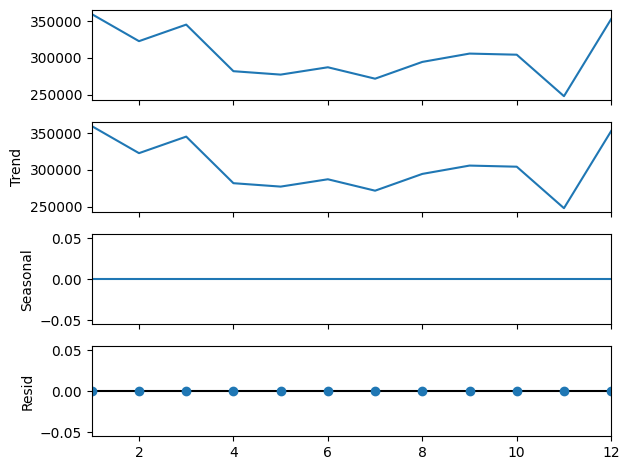

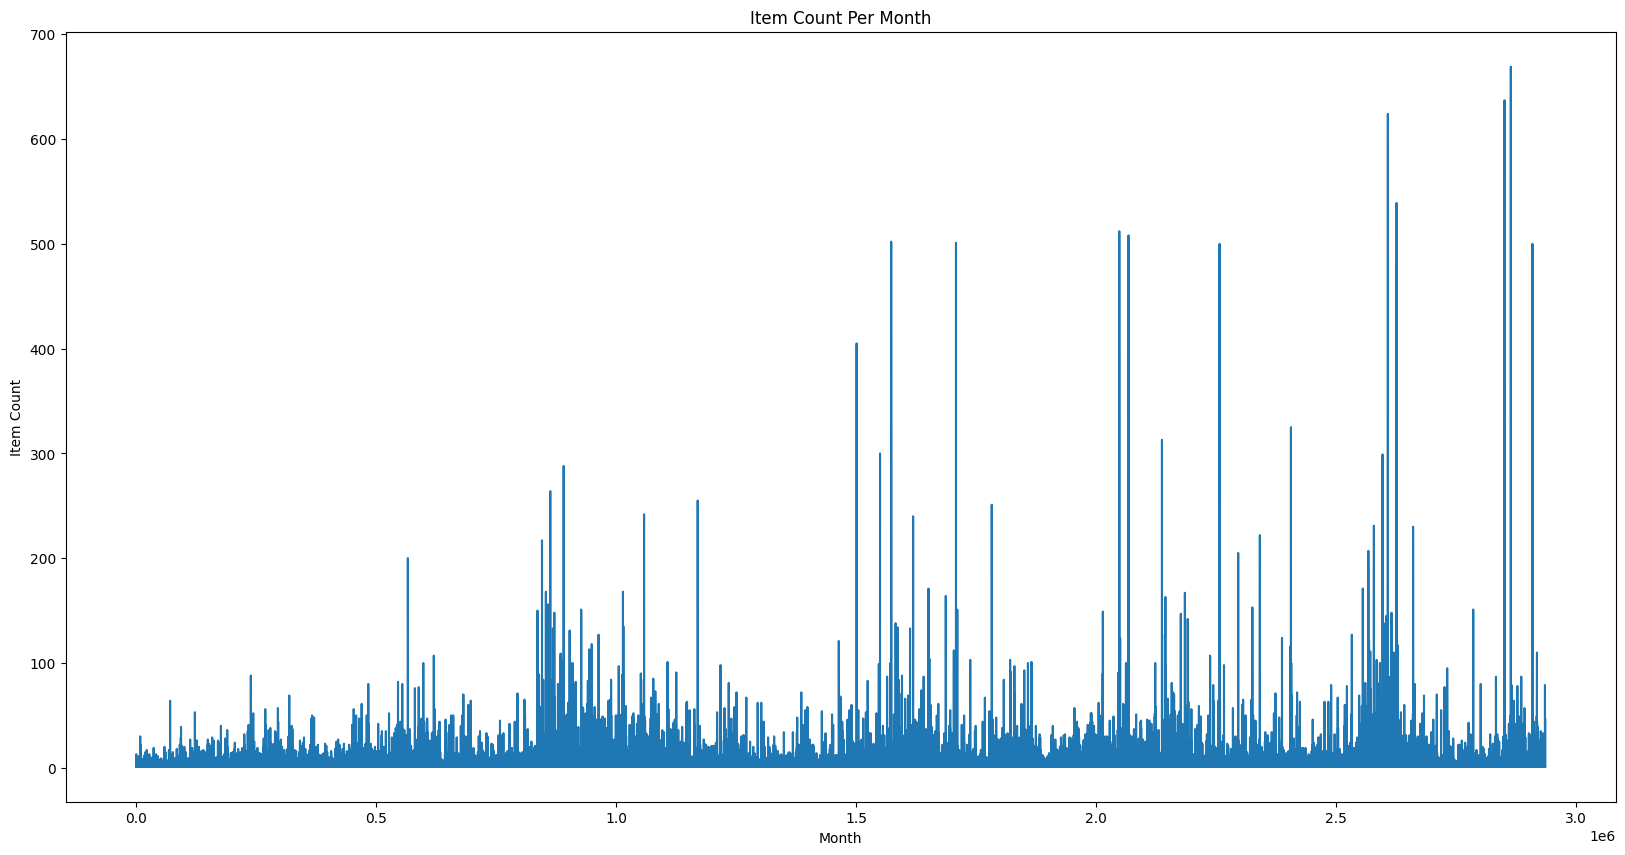

In [67]:
#performing seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(grouped_by_month_name, model='additive', period=1)

#plotting the seasonal decomposition
fig = decomposition.plot()
plt.show()

#plotting the item_cnt_month column
plt.figure(figsize=(20, 10))
plt.plot(final_dataset['item_cnt_month'])
plt.title('Item Count Per Month')
plt.xlabel('Month')
plt.ylabel('Item Count')
plt.show()



In [68]:
#regulatory analytics

grouped_by_shop_id_and_year_num = final_dataset.groupby(['shop_id', 'year_num']).agg({'item_cnt_month': 'sum'})

print("\n\nHead of grouped_by_shop_id_and_year_num:\n")
print(grouped_by_shop_id_and_year_num.head(60))



Head of grouped_by_shop_id_and_year_num:

                  item_cnt_month
shop_id year_num                
0       0                  11705
1       0                   6311
2       0                   9989
        1                  12247
        2                   8470
3       0                  10242
        1                  11039
        2                   7194
4       0                  19054
        1                  15909
        2                   9106
5       0                  14717
        1                  17041
        2                  11089
6       0                  46707
        1                  35496
        2                  18554
7       0                  28218
        1                  24530
        2                  14411
8       0                   3602
9       0                   6531
        1                   6155
        2                   3188
10      0                  11132
        1                   8859
        2                   4532

In [69]:
#Variable Identification

# Identify numerical and categorical variables
numerical_vars = final_dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = final_dataset.select_dtypes(include=['object', 'category']).columns

# Print the list of numerical and categorical variables
print("Numerical Variables:")
print(numerical_vars)

print("\nCategorical Variables:")
print(categorical_vars)

Numerical Variables:
Index(['month_name', 'year_num', 'shop_id', 'item_id', 'category_id',
       'item_price', 'item_cnt_month', 'revenue', 'log_revenue',
       'scaled_revenue'],
      dtype='object')

Categorical Variables:
Index(['date', 'date_num', 'shop_name', 'item_name', 'item_category_name',
       'price_range'],
      dtype='object')


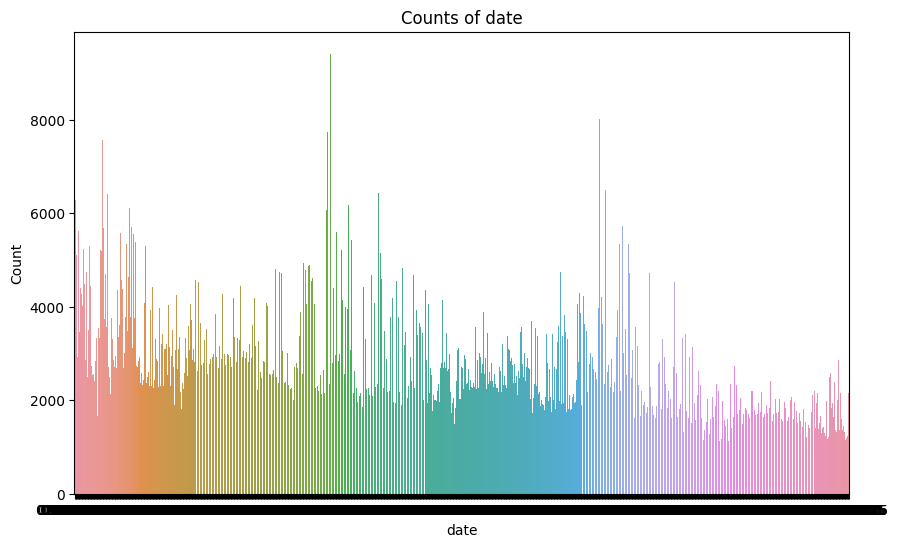

Summary Statistics for date:
count        2928483
unique          1034
top       28.12.2013
freq            9415
Name: date, dtype: object


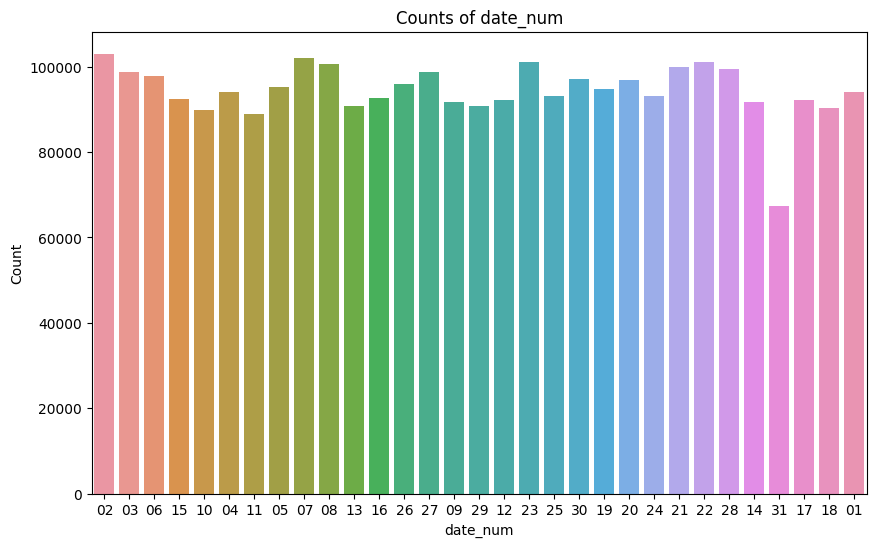

Summary Statistics for date_num:
count     2928483
unique         31
top            02
freq       103081
Name: date_num, dtype: object


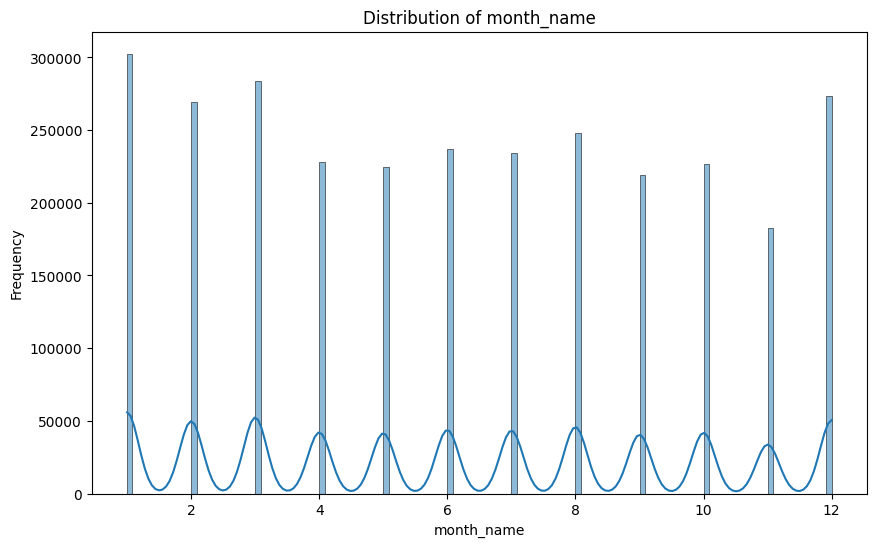

Summary Statistics for month_name:
count    2.928483e+06
mean     6.248408e+00
std      3.535921e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      1.200000e+01
Name: month_name, dtype: float64


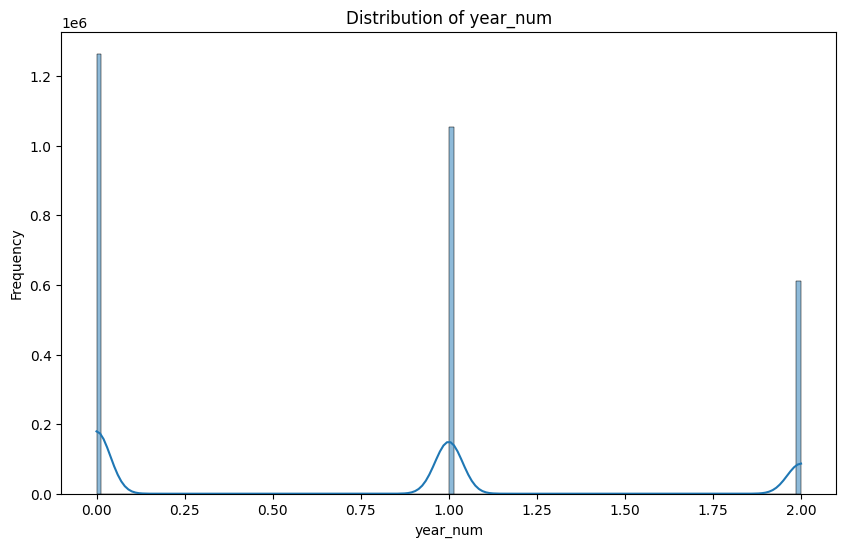

Summary Statistics for year_num:
count    2.928483e+06
mean     7.767790e-01
std      7.684598e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+00
Name: year_num, dtype: float64


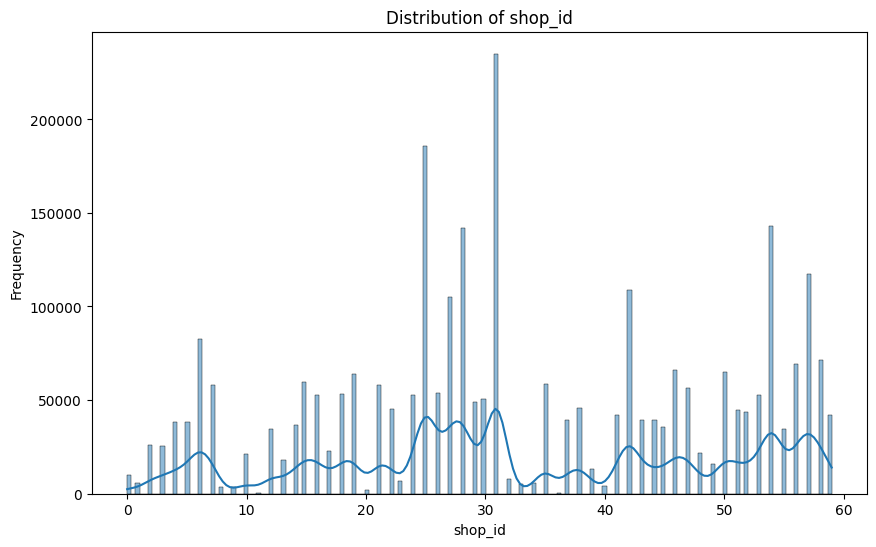

Summary Statistics for shop_id:
count    2.928483e+06
mean     3.300296e+01
std      1.622543e+01
min      0.000000e+00
25%      2.200000e+01
50%      3.100000e+01
75%      4.700000e+01
max      5.900000e+01
Name: shop_id, dtype: float64


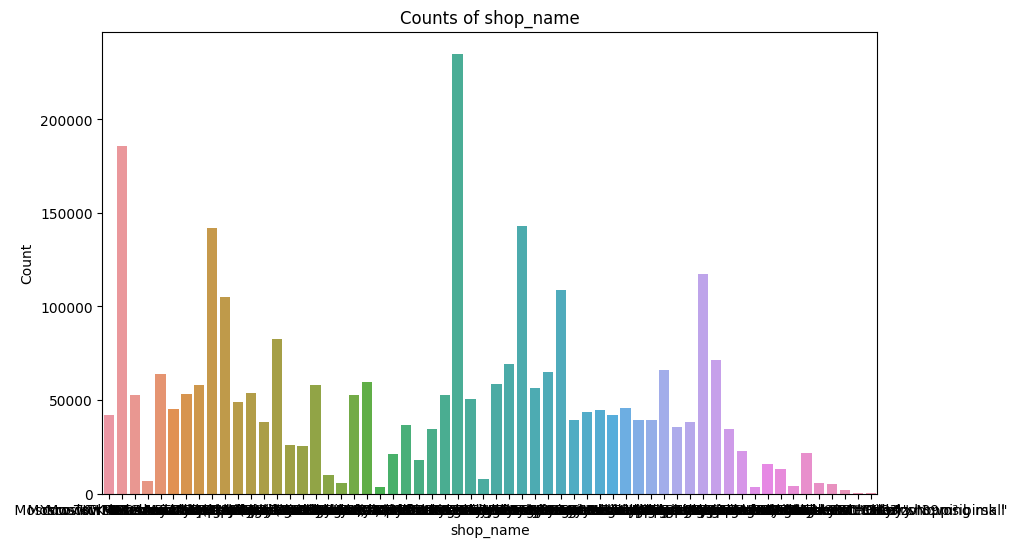

Summary Statistics for shop_name:
count                      2928483
unique                          60
top        Moscow TC" Semenovsky "
freq                        235185
Name: shop_name, dtype: object


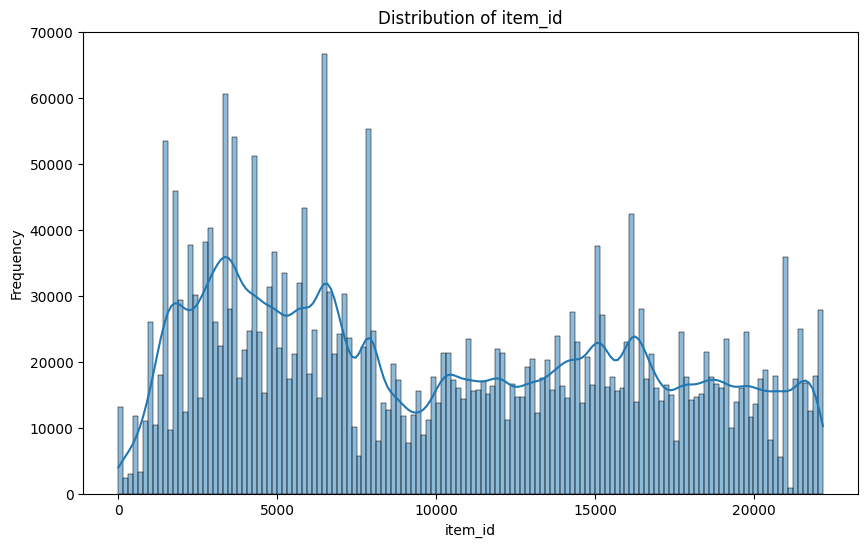

Summary Statistics for item_id:
count    2.928483e+06
mean     1.020028e+04
std      6.324391e+03
min      0.000000e+00
25%      4.477000e+03
50%      9.355000e+03
75%      1.569100e+04
max      2.216900e+04
Name: item_id, dtype: float64


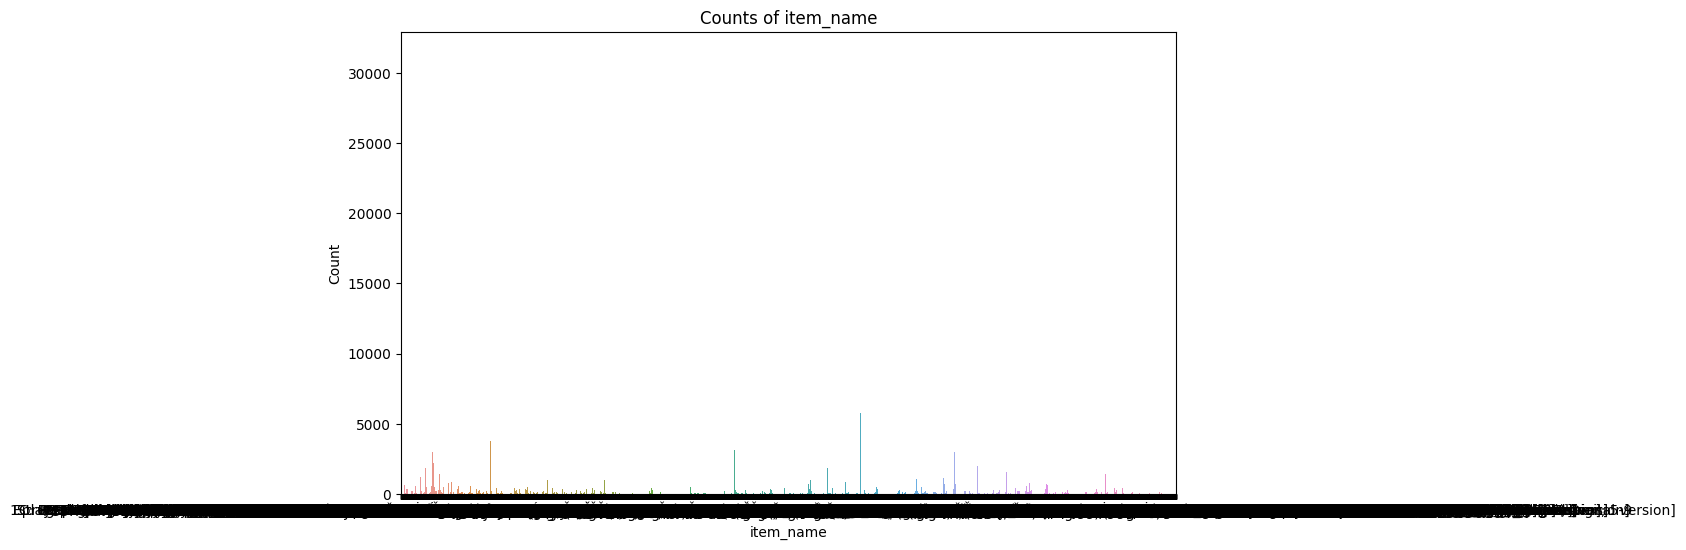

Summary Statistics for item_name:
count                                               2928483
unique                                                21782
top       Corporate package T-shirt 1C Interest white (3...
freq                                                  31336
Name: item_name, dtype: object


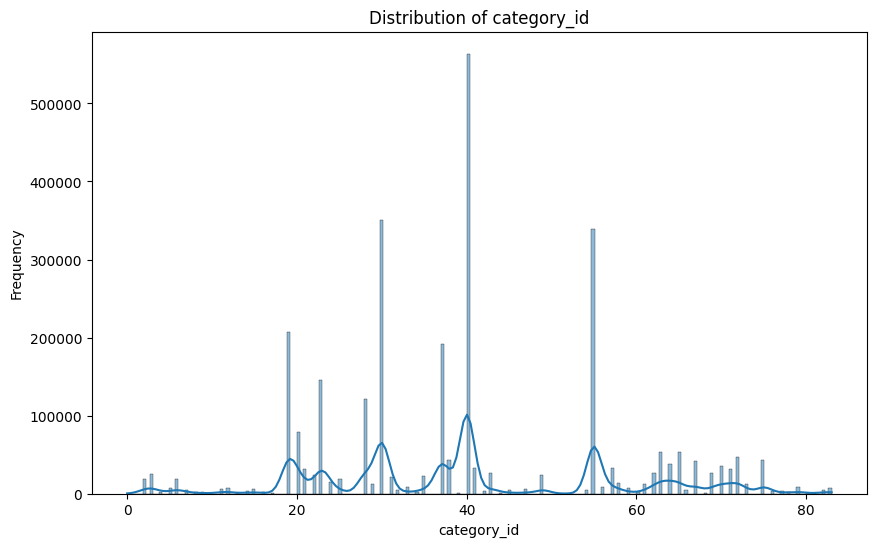

Summary Statistics for category_id:
count    2.928483e+06
mean     4.001637e+01
std      1.709809e+01
min      0.000000e+00
25%      2.800000e+01
50%      4.000000e+01
75%      5.500000e+01
max      8.300000e+01
Name: category_id, dtype: float64


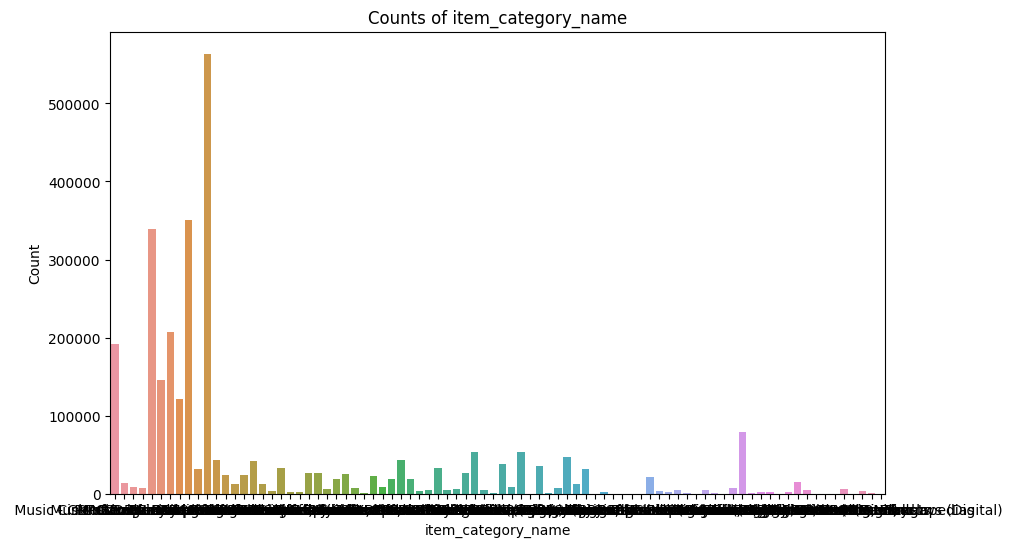

Summary Statistics for item_category_name:
count           2928483
unique               84
top        Cinema - DVD
freq             563937
Name: item_category_name, dtype: object


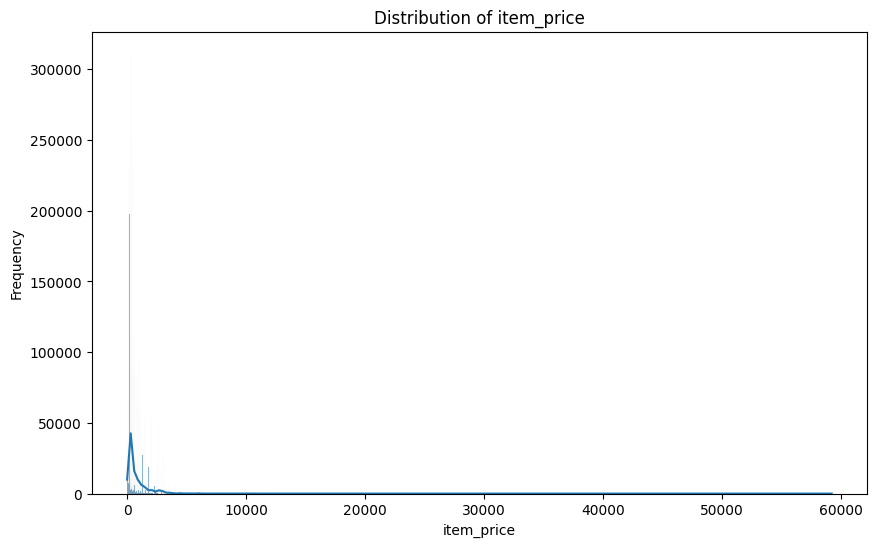

Summary Statistics for item_price:
count    2.928483e+06
mean     8.893627e+02
std      1.718155e+03
min      7.000000e-02
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      5.920000e+04
Name: item_price, dtype: float64


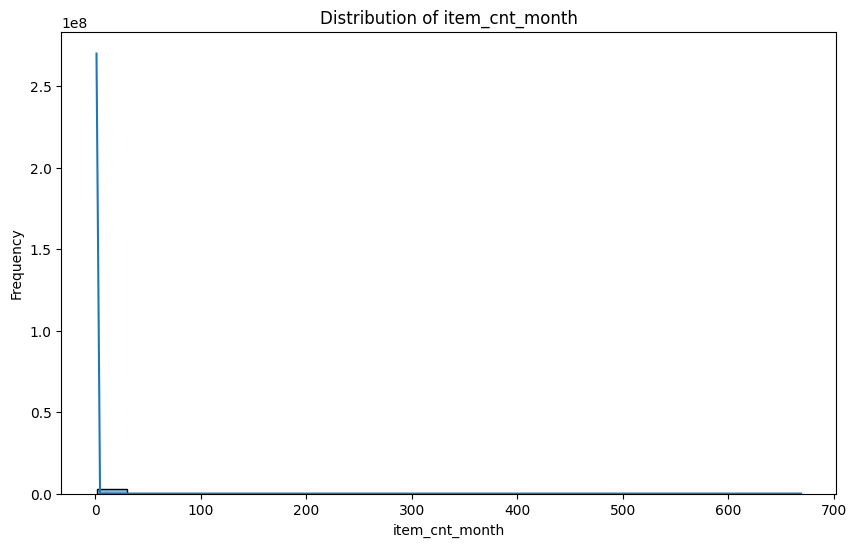

Summary Statistics for item_cnt_month:
count    2.928483e+06
mean     1.247257e+00
std      2.217429e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.690000e+02
Name: item_cnt_month, dtype: float64


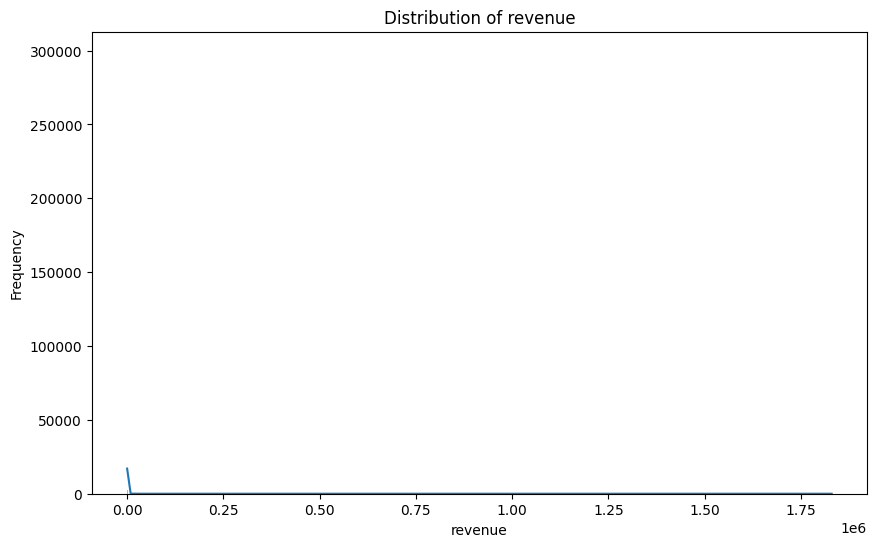

Summary Statistics for revenue:
count    2.928483e+06
mean     1.164267e+03
std      5.684853e+03
min      7.000000e-02
25%      2.490000e+02
50%      4.490000e+02
75%      1.090000e+03
max      1.829990e+06
Name: revenue, dtype: float64


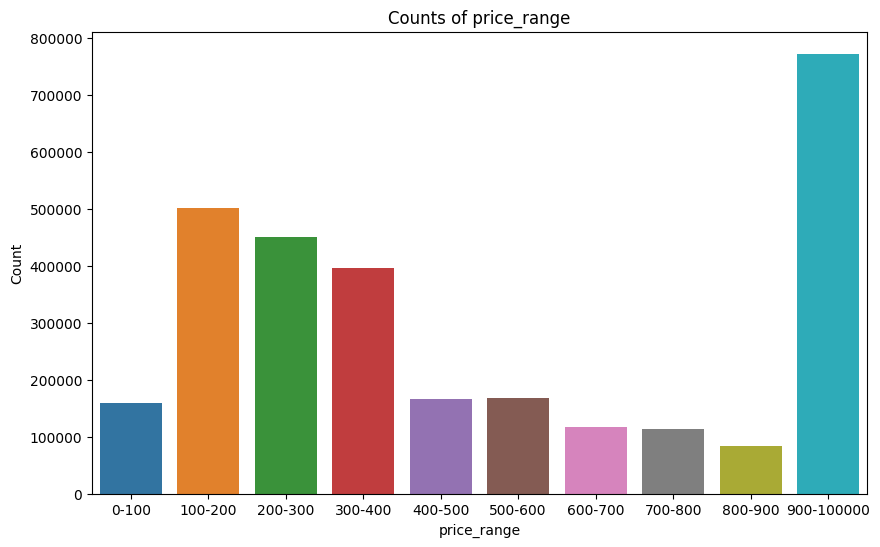

Summary Statistics for price_range:
count        2928483
unique            10
top       900-100000
freq          772112
Name: price_range, dtype: object


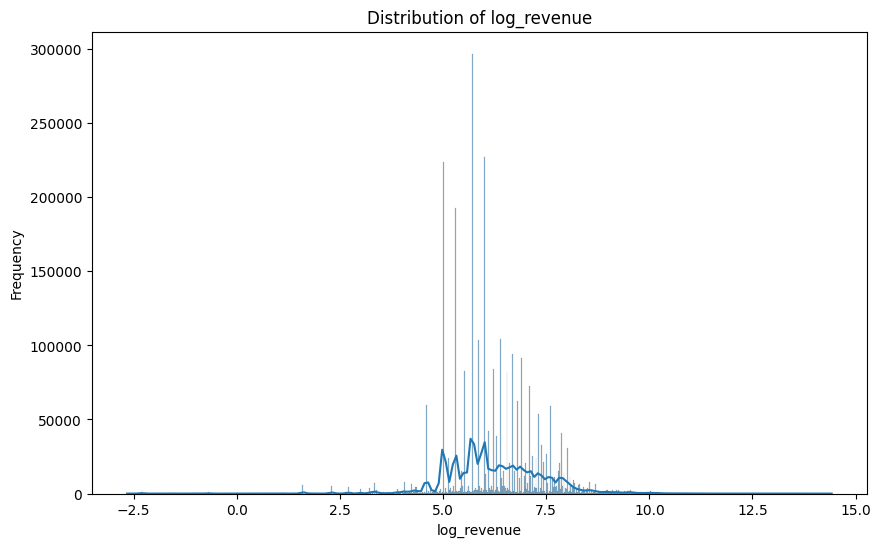

Summary Statistics for log_revenue:
count    2.928483e+06
mean     6.254676e+00
std      1.171779e+00
min     -2.659260e+00
25%      5.517453e+00
50%      6.107023e+00
75%      6.993933e+00
max      1.441982e+01
Name: log_revenue, dtype: float64


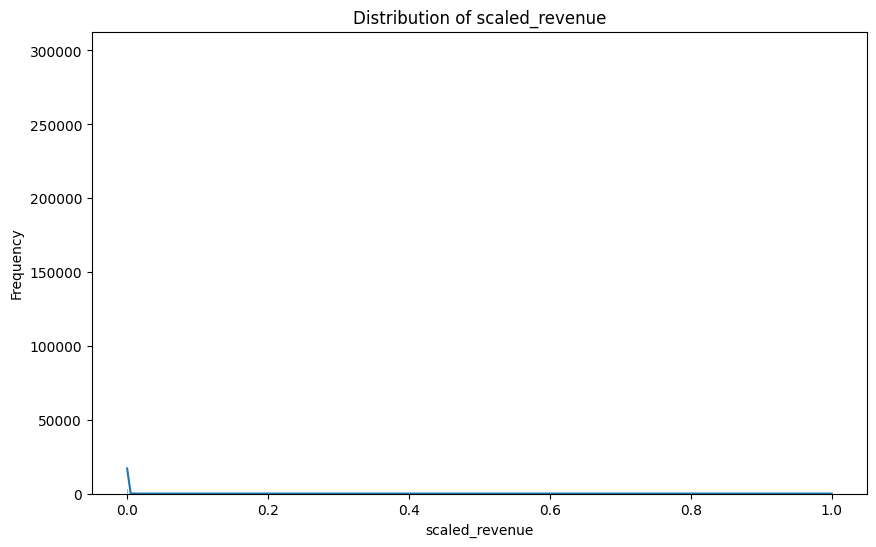

Summary Statistics for scaled_revenue:
count    2.928483e+06
mean     6.361770e-04
std      3.106494e-03
min      0.000000e+00
25%      1.360281e-04
50%      2.453183e-04
75%      5.955934e-04
max      1.000000e+00
Name: scaled_revenue, dtype: float64


In [221]:
# univariate analysis

for column in final_dataset.columns:
    variable_type = final_dataset[column].dtype
    
    summary_stats = final_dataset[column].describe()
    
    plt.figure(figsize=(10, 6))
    
    # For numerical variables, create a histogram
    if variable_type in ['int64', 'float64']:
        sns.histplot(data=final_dataset, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    # For categorical variables, create a bar plot
    else:
        sns.countplot(data=final_dataset, x=column)
        plt.title(f'Counts of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    
    plt.show()
    
    # Print summary statistics
    print(f"Summary Statistics for {column}:")
    print(summary_stats)

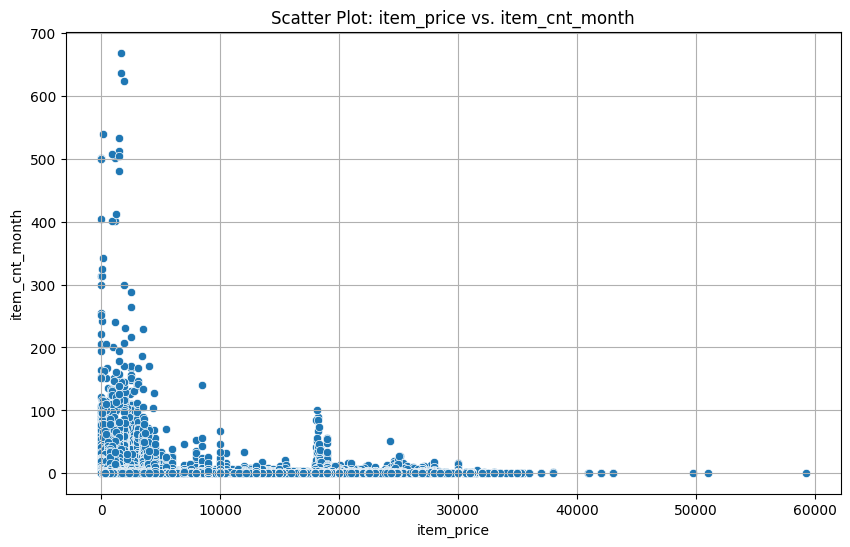

Correlation between item_price and item_cnt_month: 0.01


In [222]:
#bivariate analysis

#can analysis by changing var1 and var2
var1 = 'item_price'
var2 = 'item_cnt_month'

var1_type = final_dataset[var1].dtype
var2_type = final_dataset[var2].dtype

# Scatter Plot for Numerical vs. Numerical
if var1_type in ['int64', 'float64'] and var2_type in ['int64', 'float64']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=final_dataset, x=var1, y=var2)
    plt.title(f'Scatter Plot: {var1} vs. {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()

# Box Plot for Categorical vs. Numerical
elif var1_type in ['object', 'category'] and var2_type in ['int64', 'float64']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=final_dataset, x=var1, y=var2)
    plt.title(f'Box Plot: {var1} vs. {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)
    plt.show()

# Bar Plot for Categorical vs. Categorical
elif var1_type in ['object', 'category'] and var2_type in ['object', 'category']:
    crosstab = pd.crosstab(final_dataset[var1], final_dataset[var2])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Bar Plot: {var1} vs. {var2}')
    plt.xlabel(var1)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# Print correlation for Numerical vs. Numerical
if var1_type in ['int64', 'float64'] and var2_type in ['int64', 'float64']:
    correlation = final_dataset[[var1, var2]].corr().iloc[0, 1]
    print(f'Correlation between {var1} and {var2}: {correlation:.2f}')


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 2928483 entries, 0 to 2935848
Data columns (total 16 columns):
 #   Column              Dtype   
---  ------              -----   
 0   date                object  
 1   date_num            object  
 2   month_name          int64   
 3   year_num            int64   
 4   shop_id             int64   
 5   shop_name           object  
 6   item_id             int64   
 7   item_name           object  
 8   category_id         int64   
 9   item_category_name  object  
 10  item_price          float64 
 11  item_cnt_month      int64   
 12  revenue             float64 
 13  price_range         category
 14  log_revenue         float64 
 15  scaled_revenue      float64 
dtypes: category(1), float64(4), int64(6), object(5)
memory usage: 360.3+ MB
None

Summary Statistics for Numerical Variables:
         month_name      year_num       shop_id       item_id   category_id  \
count  2.928483e+06  2.928483e+06  2.928483e+06  2.92848

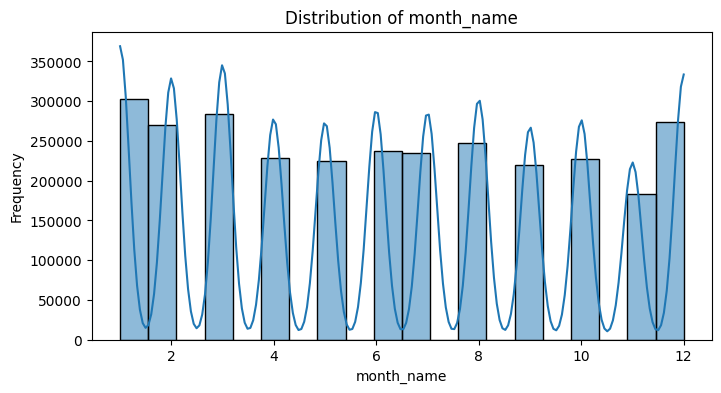

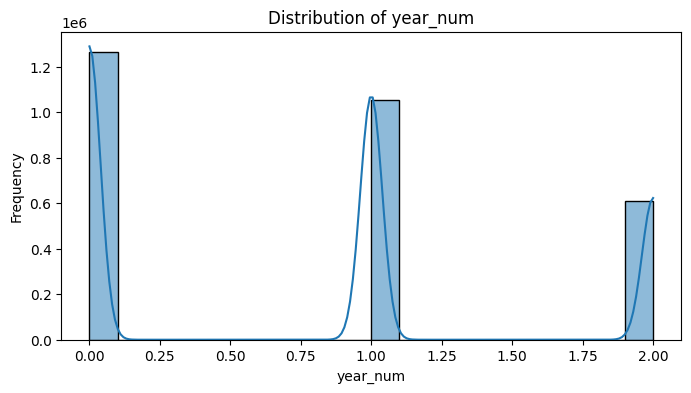

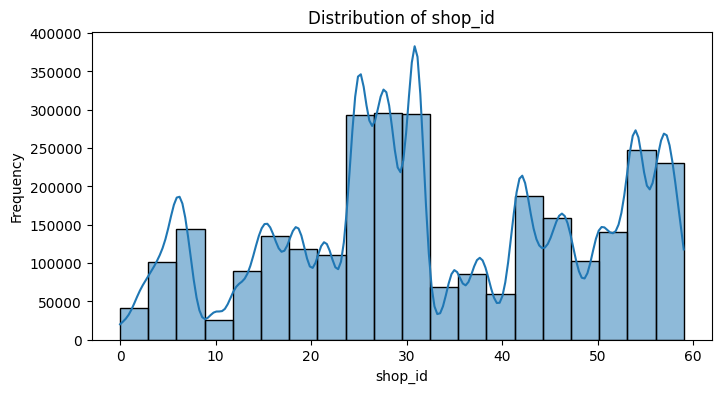

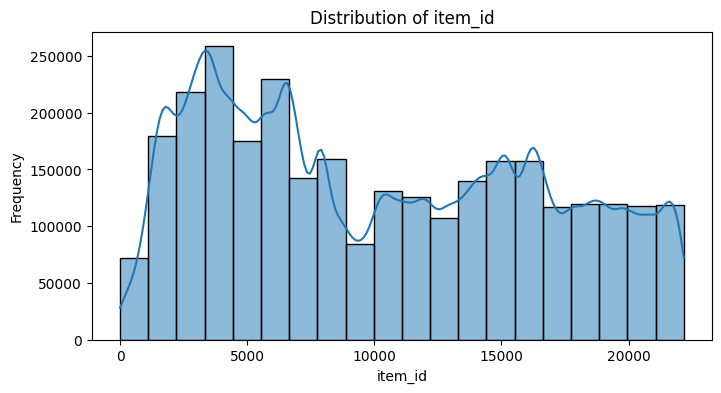

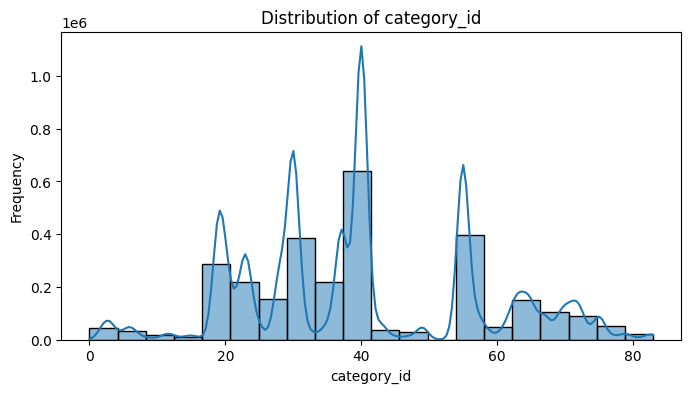

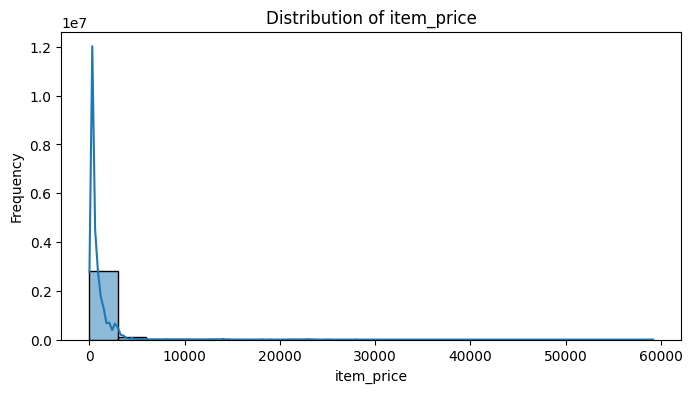

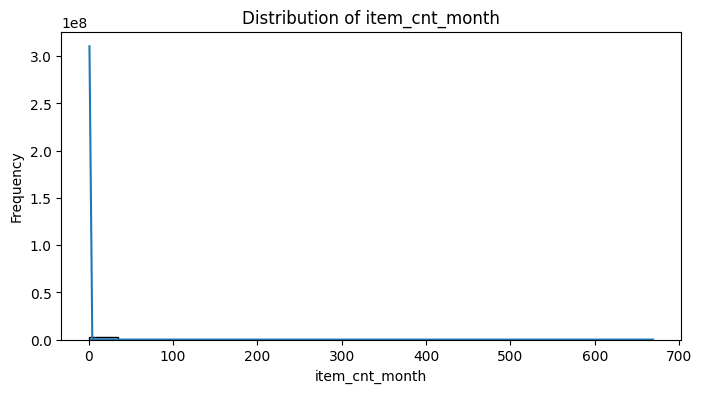

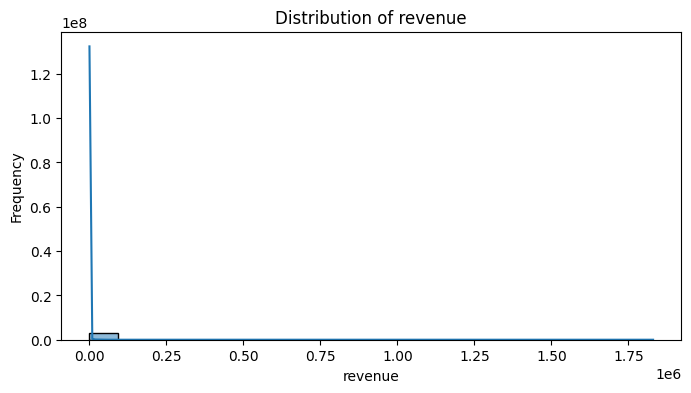

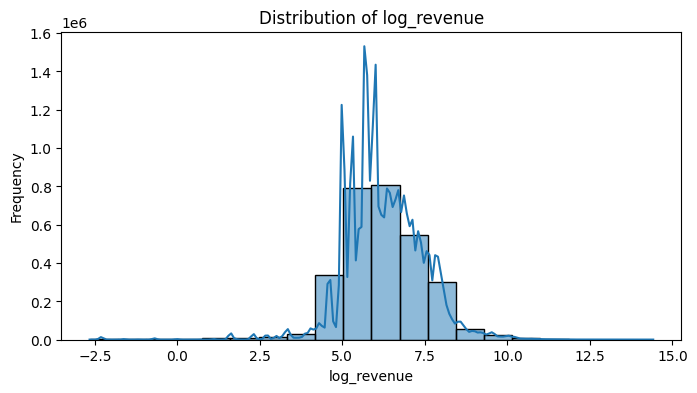

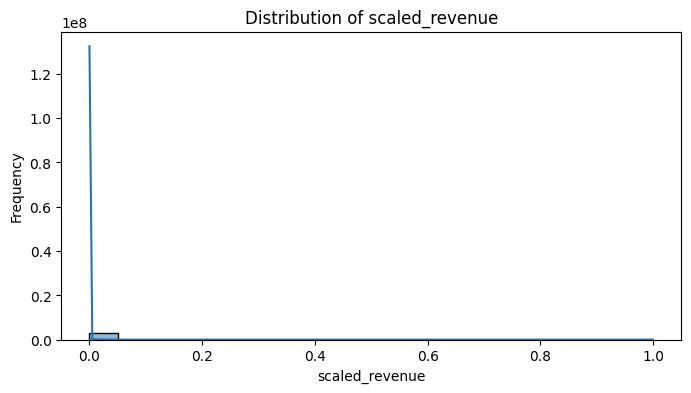

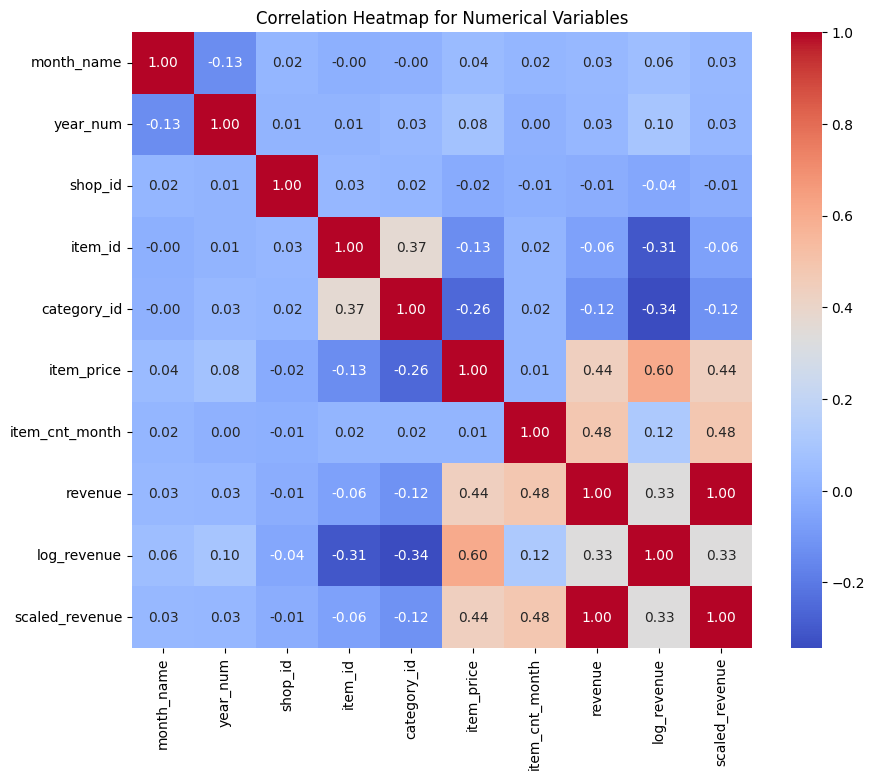

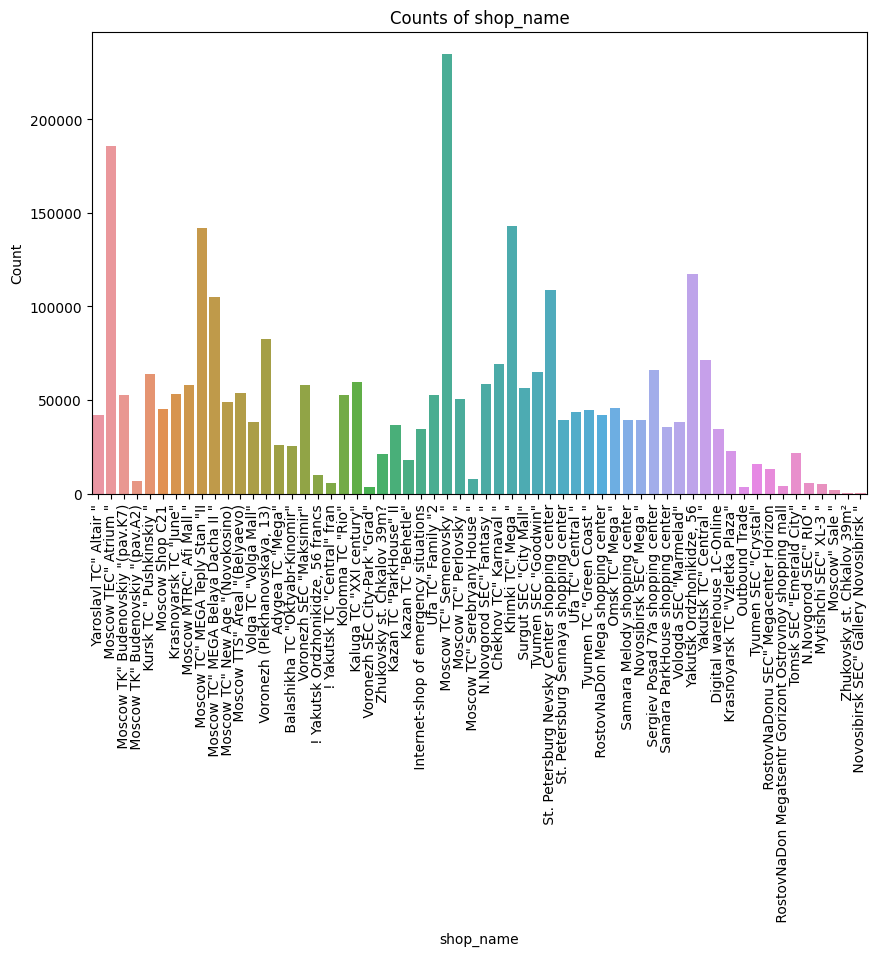

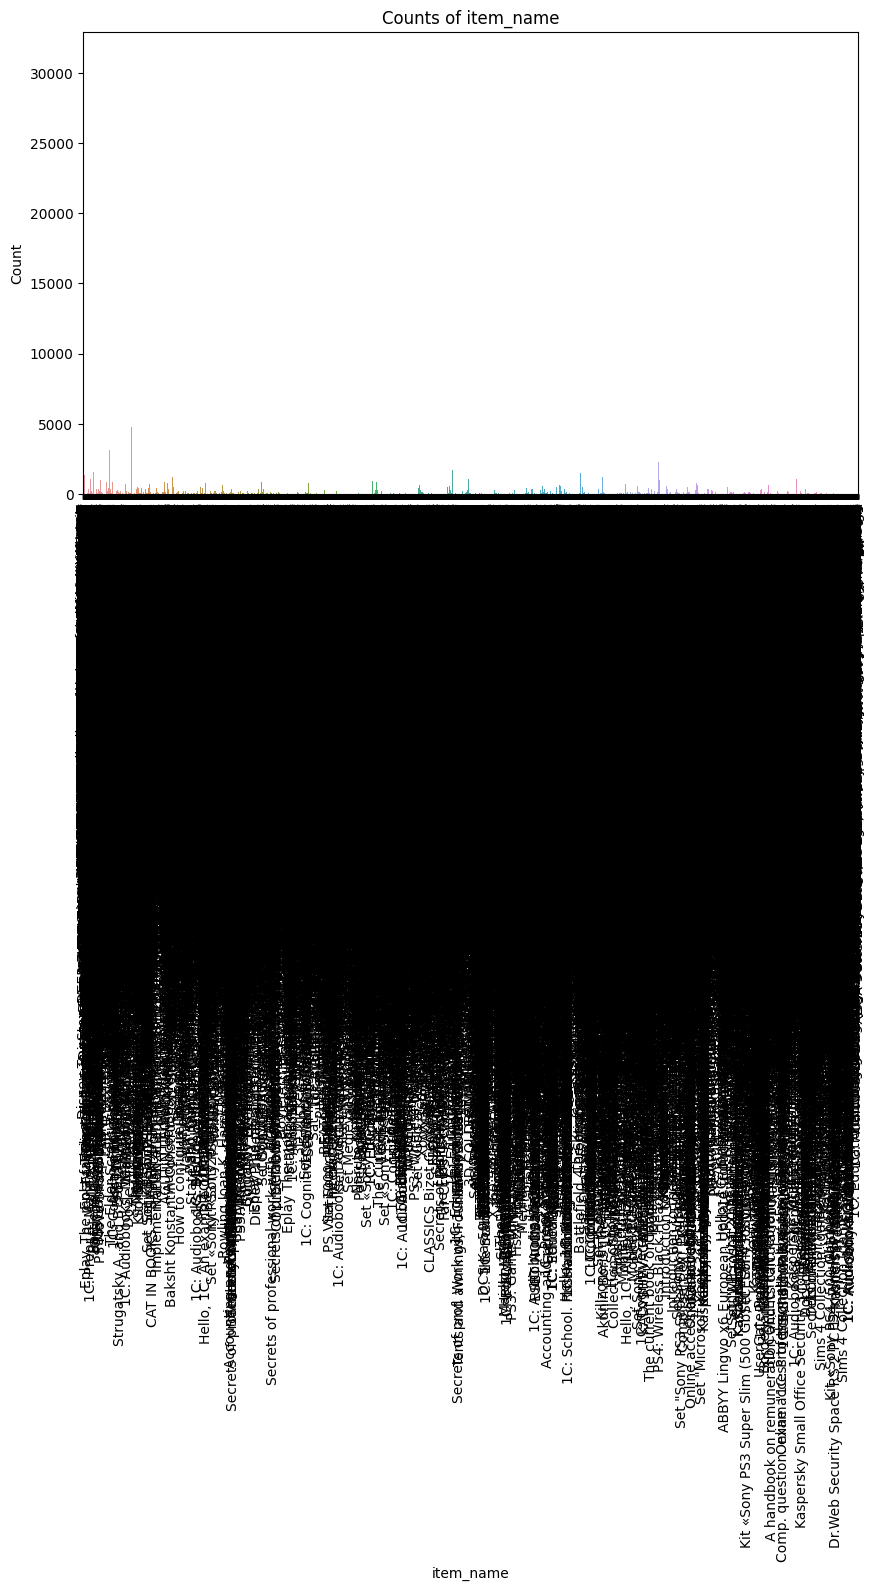

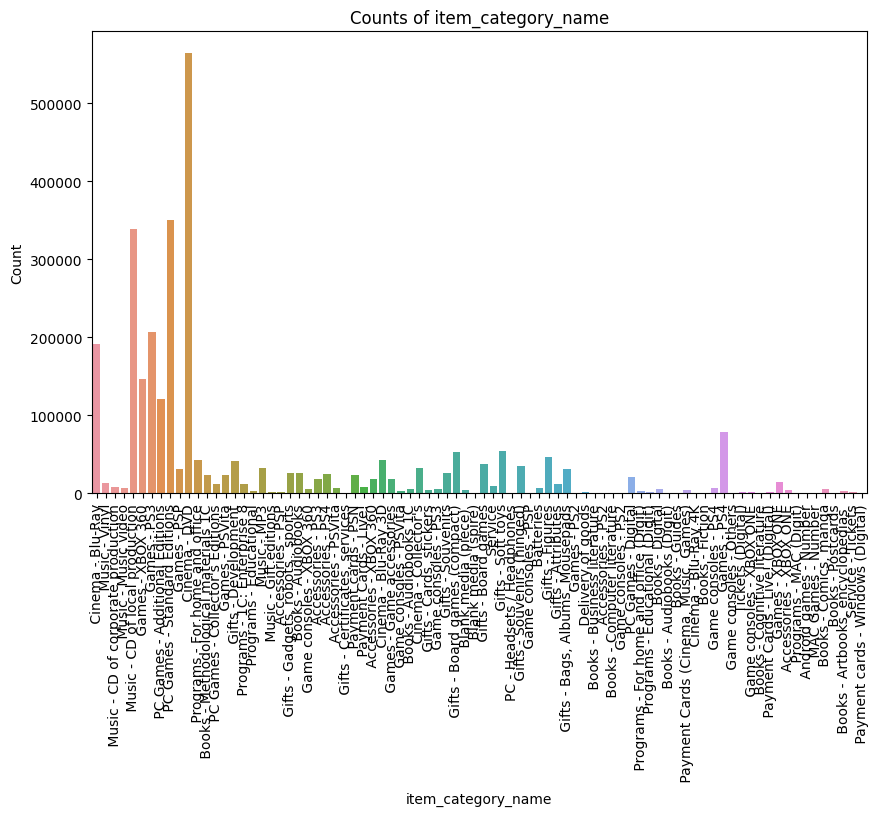

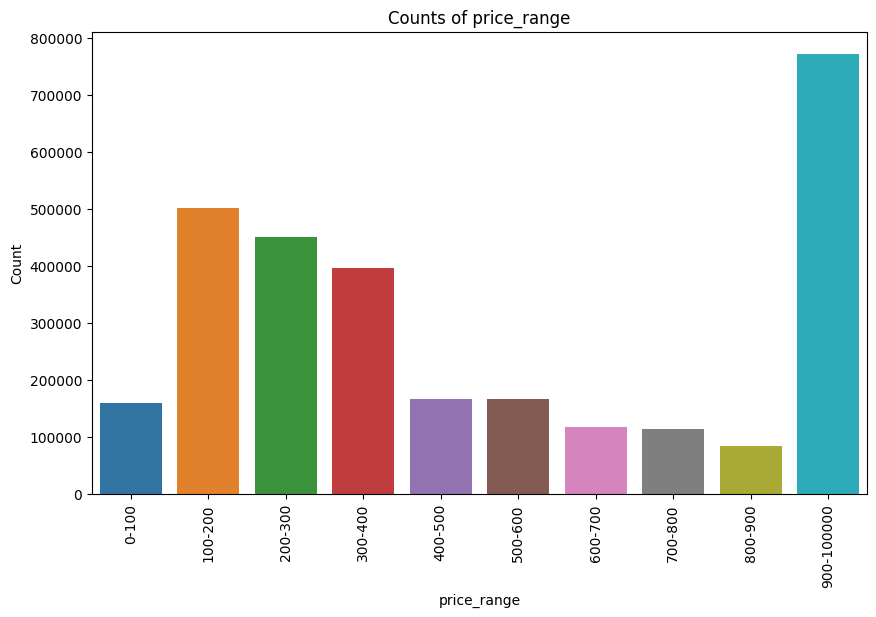

In [223]:
#Exploratory Data Analysis (EDA)

print("Dataset Overview:")
print(final_dataset.info())

print("\nSummary Statistics for Numerical Variables:")
print(final_dataset.describe())

print("\nMissing Values:")
print(final_dataset.isnull().sum())

numerical_columns = ['month_name', 'year_num', 'shop_id', 'item_id', 'category_id', 'item_price', 'item_cnt_month', 'revenue', 'log_revenue', 'scaled_revenue']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=final_dataset, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Visualize relationships between variables with a correlation matrix for numerical variables
correlation_matrix = final_dataset[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

# Explore categorical variables with bar plots
categorical_columns = ['shop_name', 'item_name', 'item_category_name', 'price_range']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=final_dataset, x=column)
    plt.title(f'Counts of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()



In [224]:
#inferential analysis

np.random.seed(42)
data = np.random.normal(loc=70, scale=10, size=100)

# Create a DataFrame from the generated data
df = pd.DataFrame({'measurement': data})

# Calculate the sample mean and standard deviation
sample_mean = df['measurement'].mean()
sample_std = df['measurement'].std()

# Define a hypothetical population mean for comparison
population_mean = 75 

# Perform a t-test to compare the sample mean with the population mean
t_statistic, p_value = stats.ttest_1samp(df['measurement'], population_mean)

# Print results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Population Mean: {population_mean}")
print(f"T-Statistic: {t_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

# Determine statistical significance
alpha = 0.05  # Significance level (adjust as needed)
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is statistically different from the population mean.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the sample mean and the population mean.")



Sample Mean: 68.96
Sample Standard Deviation: 9.08
Population Mean: 75
T-Statistic: -6.65
P-Value: 0.0000
Reject the null hypothesis: The sample mean is statistically different from the population mean.


item_category_name
 Cinema - DVD                      563937
 PC Games - Standard Editions      350787
 Music - CD of local production    339127
 Games - PS3                       207371
 Cinema - Blu-Ray                  191931
                                    ...  
 Books - Guides                         3
 Accessories - PS2                      2
 Books - Postcards                      2
 Books - Cognitive literature           1
 Game consoles - PS2                    1
Name: count, Length: 84, dtype: int64
item_category_name                                   Accessories - PS2  \
shop_name                                                                
 Adygea TC "Mega"                                                    0   
 Balashikha TC "Oktyabr-Kinomir"                                     0   
 Chekhov TC" Karnaval "                                              0   
 Digital warehouse 1C-Online                                         0   
 Internet-shop of emergency situation

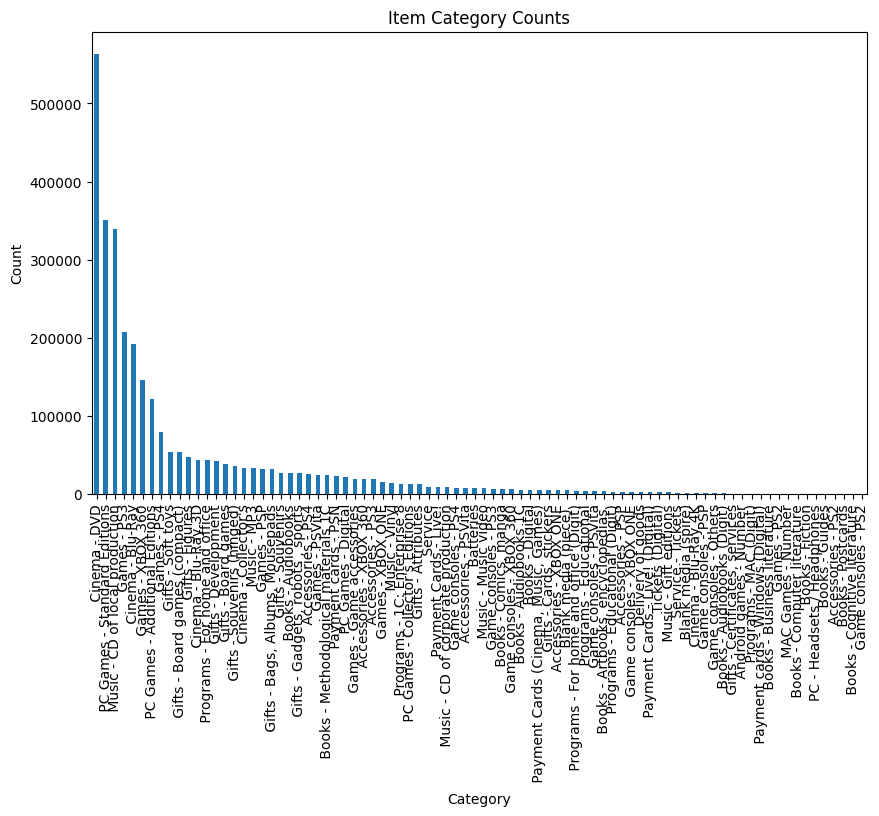

In [226]:
#qualitative analytics

category_counts = final_dataset['item_category_name'].value_counts()
print(category_counts)

cross_tab = pd.crosstab(final_dataset['shop_name'], final_dataset['item_category_name'])
print(cross_tab)

category_frequency = (final_dataset['price_range'] == 'Low').sum()
print(f"Frequency of 'Low' price range: {category_frequency}")

average_price_per_category = final_dataset.groupby('item_category_name')['item_price'].mean()
print(average_price_per_category)

category_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Item Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [227]:
#stationarity analysis

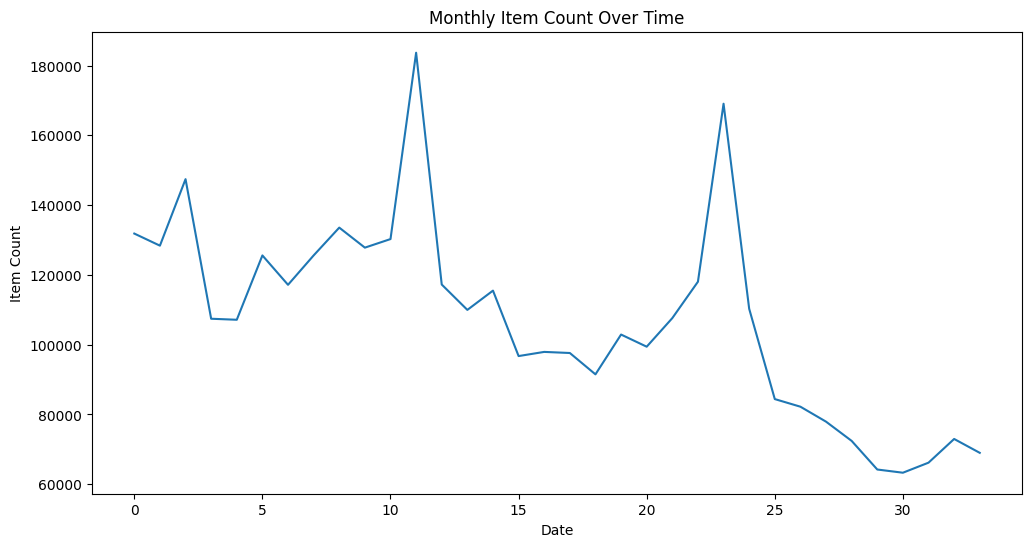

ADF Statistic: -2.372251519825604
p-value: 0.1497218397733845
Critical Values:
   1%: -3.6461350877925254
   5%: -2.954126991123355
   10%: -2.6159676124885216
Non-Stationary (Fail to reject the null hypothesis)


In [69]:
# Convert the date column to datetime format
final_dataset['date'] = pd.to_datetime(final_dataset['date'], format='%d.%m.%Y')

monthly_data = final_dataset.groupby(final_dataset['date'].dt.to_period('M')).agg({
    'item_cnt_month': 'sum',
}).reset_index()

def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    if result[1] <= 0.05:
        print("Stationary (Reject the null hypothesis)")
    else:
        print("Non-Stationary (Fail to reject the null hypothesis)")

item_cnt_month_series = monthly_data['item_cnt_month']

plt.figure(figsize=(12, 6))
plt.plot(item_cnt_month_series)
plt.title('Monthly Item Count Over Time')
plt.xlabel('Date')
plt.ylabel('Item Count')
plt.show()

adf_test(item_cnt_month_series)



In [70]:
numerical_columns = final_dataset.select_dtypes(include=['number'])

#calculating the mean, median and standard deviation for numerical variables
print("\n\nMean of final_dataset:\n")
print(numerical_columns.mean())

print("\n\nMedian of final_dataset:\n")
print(numerical_columns.median())

print("\n\nStandard Deviation of final_dataset:\n")
print(numerical_columns.std())



Mean of final_dataset:

month_name            6.248408
year_num              0.776779
shop_id              33.002959
item_id           10200.281275
category_id          40.016374
item_price          889.362730
item_cnt_month        1.247257
revenue            1164.267451
log_revenue           6.254676
scaled_revenue        0.000636
dtype: float64


Median of final_dataset:

month_name           6.000000
year_num             1.000000
shop_id             31.000000
item_id           9355.000000
category_id         40.000000
item_price         399.000000
item_cnt_month       1.000000
revenue            449.000000
log_revenue          6.107023
scaled_revenue       0.000245
dtype: float64


Standard Deviation of final_dataset:

month_name           3.535921
year_num             0.768460
shop_id             16.225426
item_id           6324.390884
category_id         17.098094
item_price        1718.155164
item_cnt_month       2.217429
revenue           5684.853342
log_revenue          1.171

In [143]:
print("\n\nHead of final_dataset:\n")
print(final_dataset.head(20))
print(final_dataset.shape)
print(final_dataset.info())



Head of final_dataset:

         date date_num  month_name  year_num  shop_id  \
0  2013-01-02       02           1         0       59   
1  2013-01-03       03           1         0       25   
3  2013-01-06       06           1         0       25   
4  2013-01-15       15           1         0       25   
5  2013-01-10       10           1         0       25   
6  2013-01-02       02           1         0       25   
7  2013-01-04       04           1         0       25   
8  2013-01-11       11           1         0       25   
9  2013-01-03       03           1         0       25   
10 2013-01-03       03           1         0       25   
11 2013-01-05       05           1         0       25   
12 2013-01-07       07           1         0       25   
13 2013-01-08       08           1         0       25   
14 2013-01-10       10           1         0       25   
15 2013-01-11       11           1         0       25   
16 2013-01-13       13           1         0       25   
17 20

In [231]:
#export the final dataset to csv file
final_dataset.to_csv('./data-set/output/final_dataset_with_cleaning.csv', index=False)

## Model Development, Error Analysis & Comparison

In [70]:
#prepare the data for modeling
df = pd.read_csv('./data-set/sales_train.csv')
#rename item_cnt_day column
df.rename(columns={'item_cnt_day': 'item_count'}, inplace=True)
#removes duplicates
df.drop_duplicates(inplace=True)
#outlier treatment
df = df[(df['item_count'] > 0) & (df['item_count'] < 307980)]
df = df[df['item_count'] < 1000]
#handles incorrect data
df = df[(df['item_price'] > 0) & (df['item_price'] < 100000)]
#converts date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
#convert date to year-month format
df['year-month'] = df['date'].dt.strftime('%Y-%m')
#drop date column and item_price column
df.drop(columns=['date', 'item_price'], inplace=True)
# group features
df_train_group = df.groupby(['year-month', 'shop_id', 'item_id']).sum().reset_index()
# pivot table
df = df_train_group.pivot_table(index=['shop_id', 'item_id'], columns='year-month', values='item_count', fill_value=0).reset_index()

print(df.head(10))
print(df.shape)
print(df.info())

year-month  shop_id  item_id  2013-01  2013-02  2013-03  2013-04  2013-05  \
0                 0       30        0       31        0        0        0   
1                 0       31        0       11        0        0        0   
2                 0       32        6       10        0        0        0   
3                 0       33        3        3        0        0        0   
4                 0       35        1       14        0        0        0   
5                 0       36        0        1        0        0        0   
6                 0       40        0        1        0        0        0   
7                 0       42        0        1        0        0        0   
8                 0       43        1        0        0        0        0   
9                 0       49        0        2        0        0        0   

year-month  2013-06  2013-07  2013-08  ...  2015-01  2015-02  2015-03  \
0                 0        0        0  ...        0        0        0   
1     

In [16]:
#export the final dataset to csv file
df.to_csv('./data-set/output/dataset_for_modeling.csv', index=False)

In [71]:
# Create X and y variables for train and test sets
X = df[df.columns[:-1]]
y = df[df.columns[-1]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(339277, 35)
(84820, 35)
(339277,)
(84820,)


In [72]:
#creating evaluation metrics
scores_and_names = []

# Create a function to evaluate the model
def evaluate_the_model(y_true, y_pred, model_name, model, index=None):
    if not isinstance(y_true, pd.Series):
        if index is None:
            index = range(len(y_true))
        y_true = pd.Series(y_true, index=index)

    # Calculate the MAE
    mae = mean_absolute_error(y_true, y_pred)
    print(f"MAE for {model_name}: {mae:.5f}")

    # Calculate the MSE
    mse = mean_squared_error(y_true, y_pred)
    print(f"MSE for {model_name}: {mse:.5f}")

    # Calculate the RMSE
    rmse = np.sqrt(mse)
    print(f"RMSE for {model_name}: {rmse:.5f}")

    #calculate r2 score
    r2 = r2_score(y_true, y_pred)
    print(f"R2 for {model_name}: {r2:.5f}")

    # Plot the predictions vs. the actual values
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x=y_true.index, y=y_true, label='Actual Values')
    sns.lineplot(x=y_true.index, y=y_pred, label='Predicted Values')
    plt.title(f'Predictions vs. Actual Values ({model_name})')
    plt.xlabel('Observation')
    plt.ylabel('Item Count')
    plt.legend()
    plt.show()

    scores_and_names.append((model_name, rmse))

    

### Decision Tree

MAE for Decision Tree: 0.17993
MSE for Decision Tree: 1.39769
RMSE for Decision Tree: 1.18224
R2 for Decision Tree: 0.46010


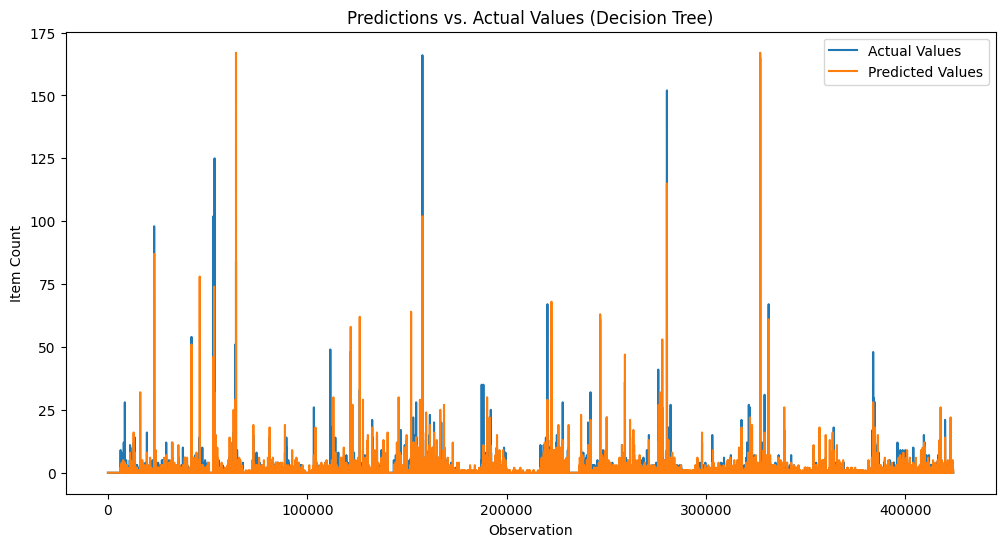

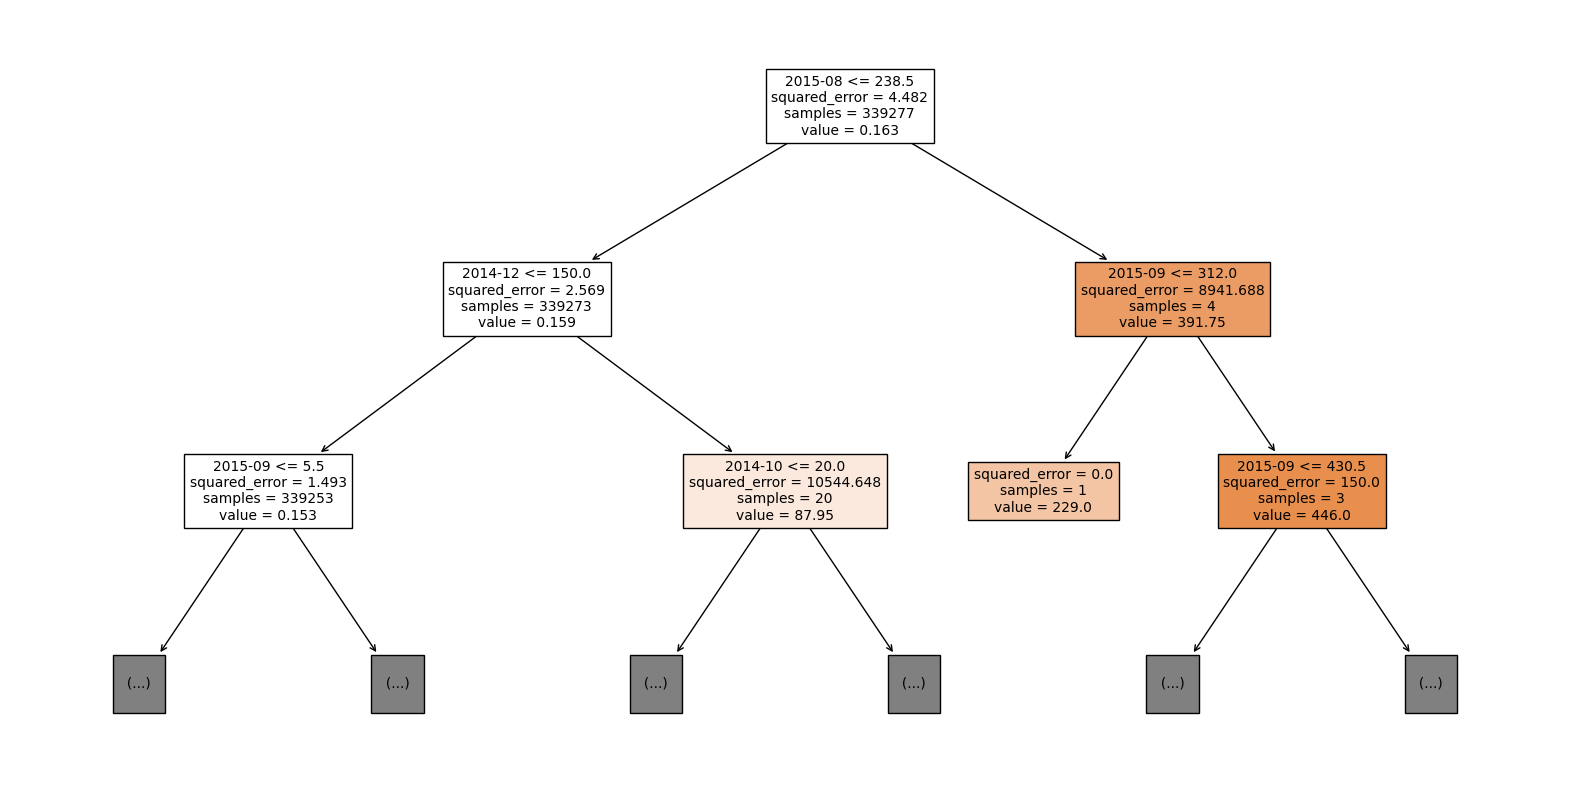

In [73]:
# create a decision tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Decision Tree', dt)

#visualize the decision tree
feature_names = list(X.columns)
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=feature_names, max_depth=2, fontsize=10)
plt.show()

### linear regression

MAE for Linear Regression: 0.29022
MSE for Linear Regression: 2.39626
RMSE for Linear Regression: 1.54798
R2 for Linear Regression: 0.07438


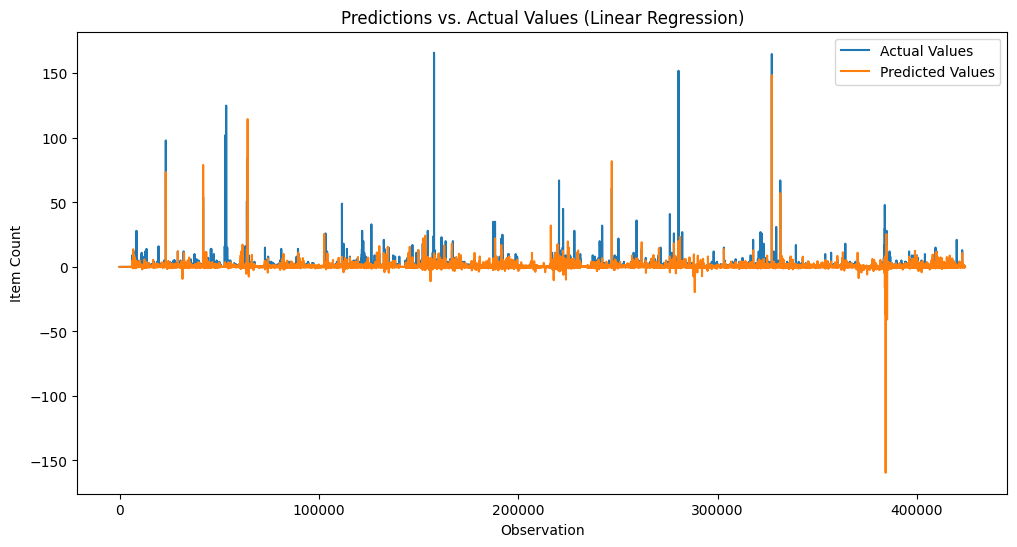

In [74]:
# Create a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Linear Regression', lin_reg)


### KNN

MAE for K-Nearest Neighbors: 0.18599
MSE for K-Nearest Neighbors: 1.60036
RMSE for K-Nearest Neighbors: 1.26505
R2 for K-Nearest Neighbors: 0.38182


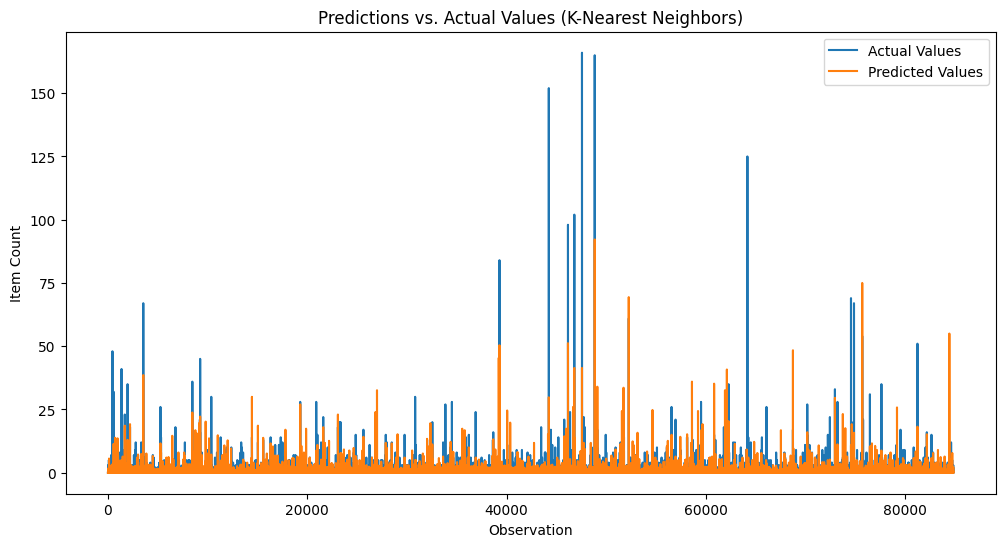

In [75]:
# create a knn model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.values, y_train.values)
y_pred = knn.predict(X_test.values)

evaluate_the_model(y_test.values, y_pred, 'K-Nearest Neighbors', knn)

### random forest

MAE for Random Forest: 0.16235
MSE for Random Forest: 1.09730
RMSE for Random Forest: 1.04752
R2 for Random Forest: 0.57614


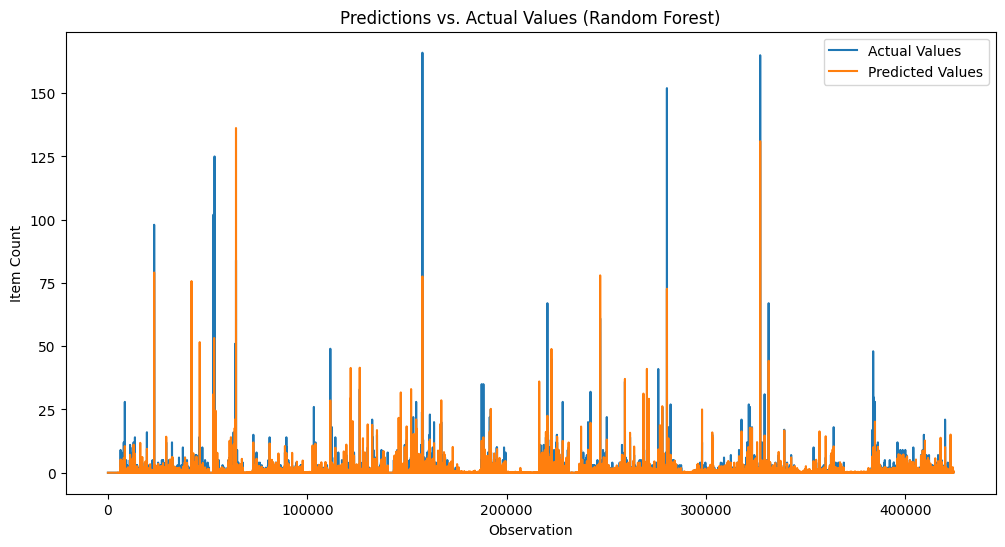

In [76]:
# create a random forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Random Forest', rf)

### Logistic Regression

C:\Users\srume\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MAE for Logistic Regression: 0.16065
MSE for Logistic Regression: 2.61462
RMSE for Logistic Regression: 1.61698
R2 for Logistic Regression: -0.00997


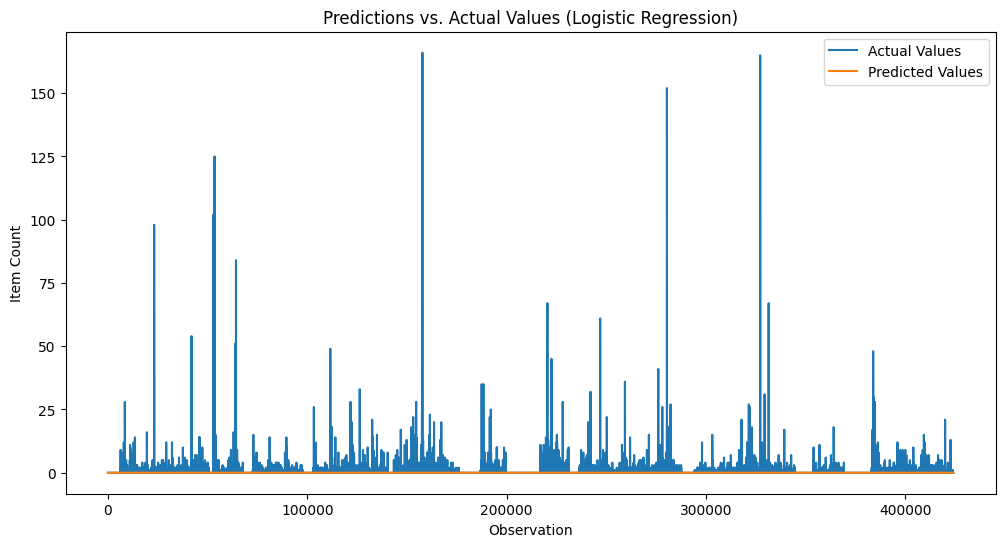

In [77]:
# Create a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Logistic Regression', log_reg)

### Stochastic Gradient Descent

C:\Users\srume\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


MAE for Stochastic Gradient Descent: 6801530630091852.00000
MSE for Stochastic Gradient Descent: 59446511967377434102125327024128.00000
RMSE for Stochastic Gradient Descent: 7710156416531213.00000
R2 for Stochastic Gradient Descent: -22962853703356121193678207188992.00000


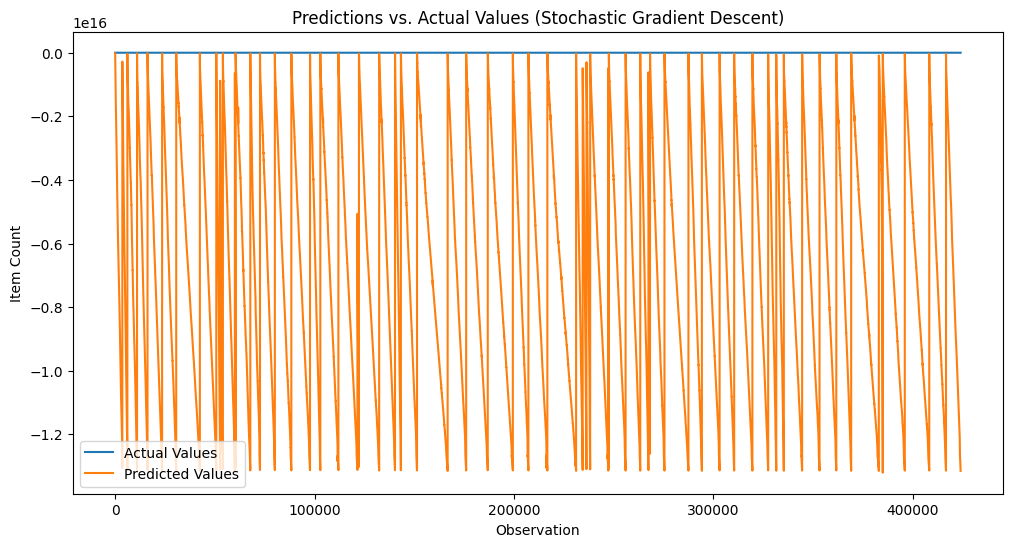

In [78]:
#create a stochastic gradient descent model
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
y_pred = sgd_reg.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Stochastic Gradient Descent', sgd_reg)

### xtra tree

MAE for Extra Trees: 0.17564
MSE for Extra Trees: 1.10864
RMSE for Extra Trees: 1.05292
R2 for Extra Trees: 0.57176


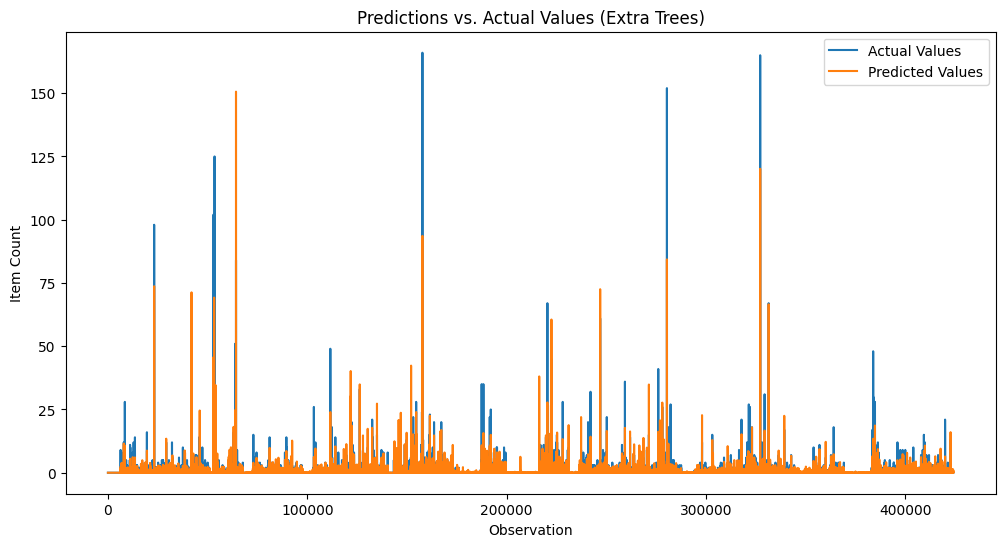

In [79]:
#create a extra trees model
et = ExtraTreesRegressor()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Extra Trees', et)

### XGBoost

MAE for XGBoost: 0.21046
MSE for XGBoost: 1.69069
RMSE for XGBoost: 1.30027
R2 for XGBoost: 0.34692


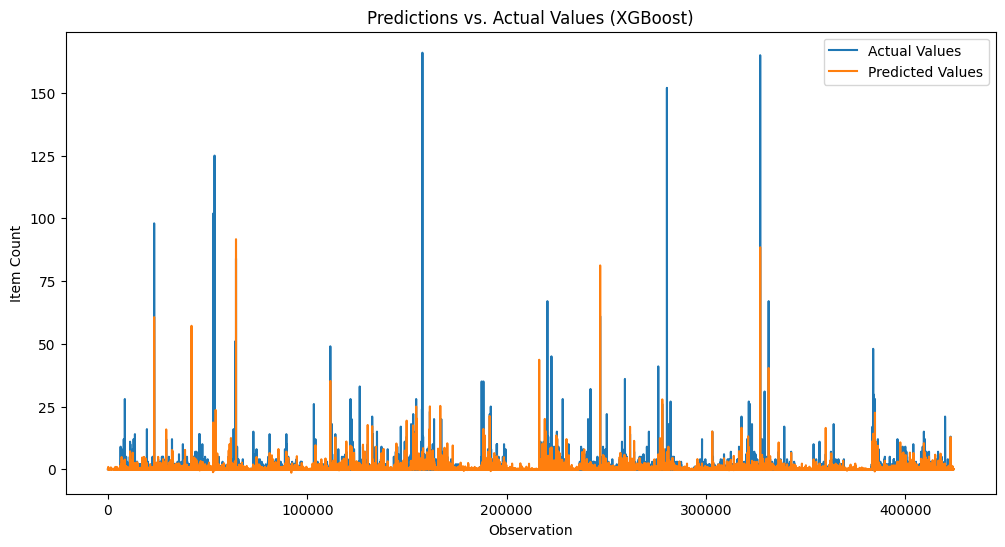

In [80]:
#create a xgboost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

evaluate_the_model(y_test, y_pred, 'XGBoost', xgb)

### ridge regression

MAE for Ridge Regression: 0.29022
MSE for Ridge Regression: 2.39625
RMSE for Ridge Regression: 1.54798
R2 for Ridge Regression: 0.07438


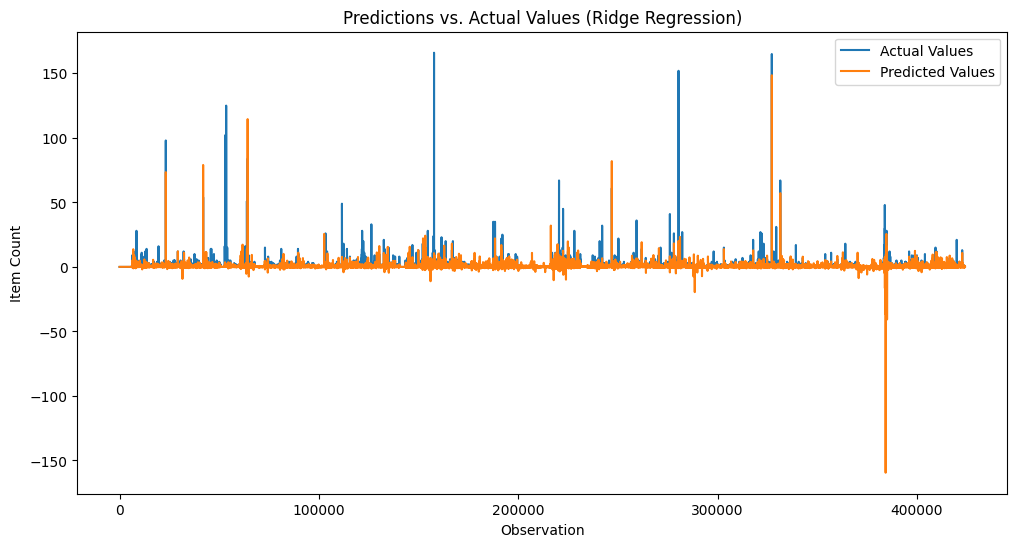

In [81]:
#create ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Ridge Regression', ridge)

### lasso regression

MAE for Lasso Regression: 0.26487
MSE for Lasso Regression: 2.11585
RMSE for Lasso Regression: 1.45460
R2 for Lasso Regression: 0.18269


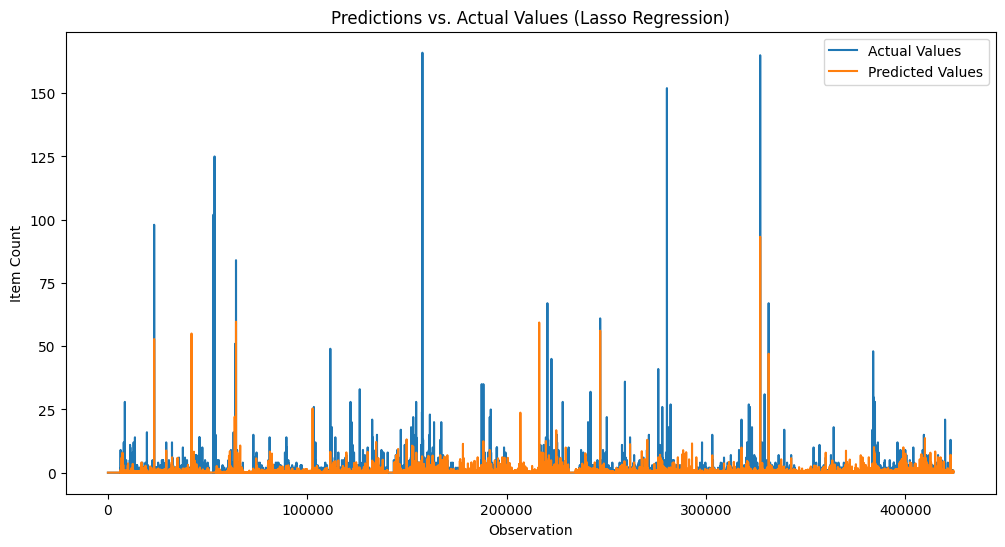

In [82]:
#create lasso regression model
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

evaluate_the_model(y_test, y_pred, 'Lasso Regression', lasso)

### ARIMA

c:\Users\srume\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\srume\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\srume\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\srume\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\srume\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

MAE for ARIMA: 0.30035
MSE for ARIMA: 2.58882
RMSE for ARIMA: 1.60898
R2 for ARIMA: -0.00000


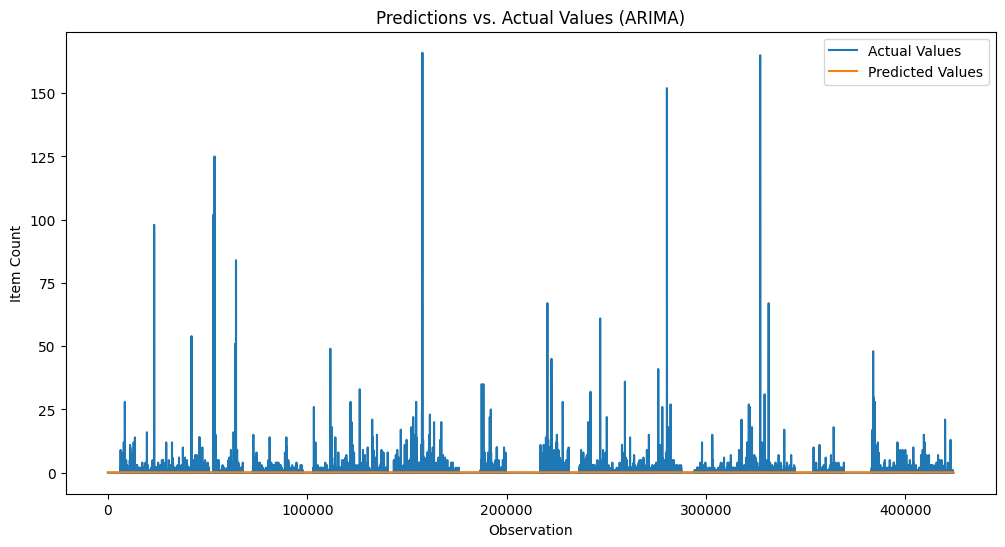

In [83]:
#create ARIMA model
arima = ARIMA(y_train, order=(1, 1, 1))
model = arima.fit()
y_pred = model.predict(start=len(y_train), end=len(y_train) + len(X_test) - 1, exog=X_test)

evaluate_the_model(y_test, y_pred, 'ARIMA', arima)

### ADABOOST

Accuracy: -63.42%
MAE for AdaBoost: 1.35250
MSE for AdaBoost: 4.23068
RMSE for AdaBoost: 2.05686
R2 for AdaBoost: -0.63422


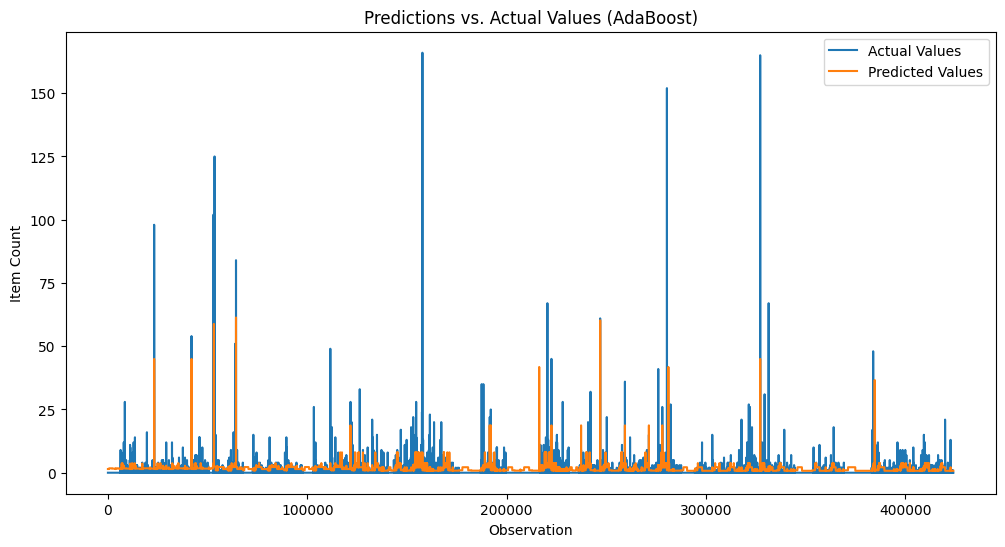

In [84]:
#create adaboost model
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

accuracy = ada.score(X_test, y_test)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

evaluate_the_model(y_test, y_pred, 'AdaBoost', ada)

### BayesianRidge

Accuracy: 7.46%
MAE for Bayesian Ridge: 0.29018
MSE for Bayesian Ridge: 2.39567
RMSE for Bayesian Ridge: 1.54780
R2 for Bayesian Ridge: 0.07461


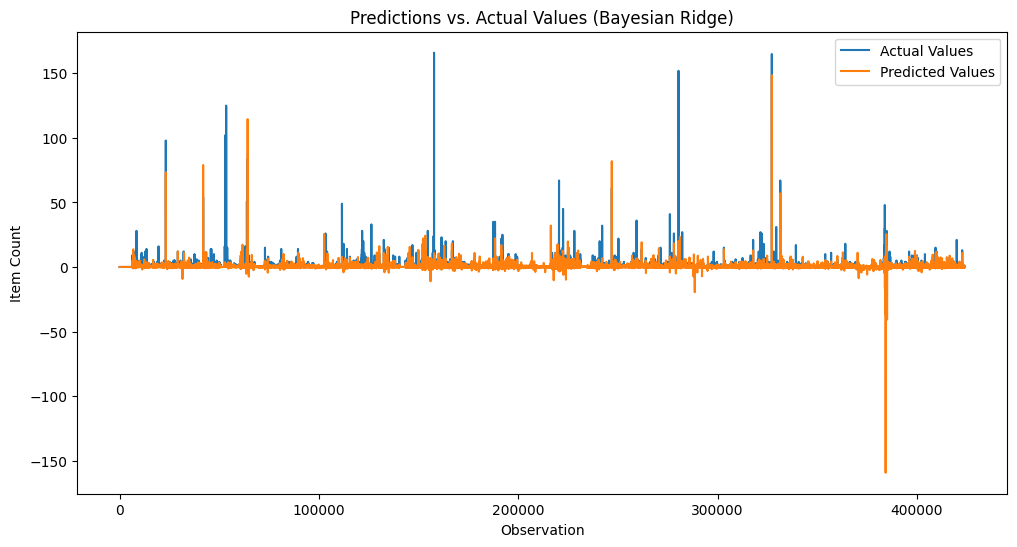

In [85]:
# create bayesian ridge model
br = BayesianRidge()
br.fit(X_train, y_train)
y_pred = br.predict(X_test)

accuracy = br.score(X_test, y_test)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

evaluate_the_model(y_test, y_pred, 'Bayesian Ridge', br)

### SVM

Accuracy: 92.66%
MAE for Support Vector Machine: 0.16065
MSE for Support Vector Machine: 2.61462
RMSE for Support Vector Machine: 1.61698
R2 for Support Vector Machine: -0.00997


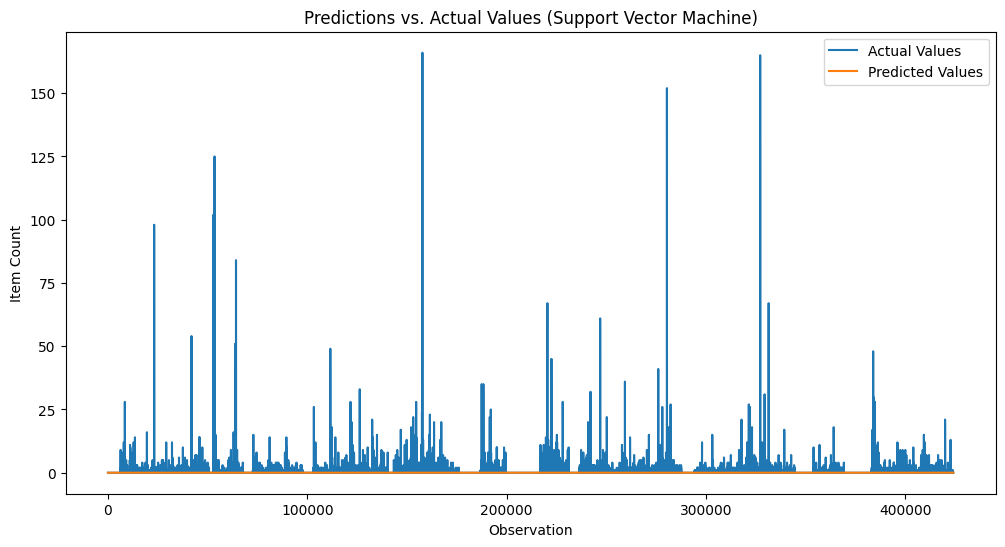

In [86]:
# create a support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = svm.score(X_test, y_test)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

evaluate_the_model(y_test, y_pred, 'Support Vector Machine', svm)

### Compare Models

In [92]:
results = pd.DataFrame(scores_and_names, columns=['Model', 'RMSE'])

                          Model                  RMSE
5   Stochastic Gradient Descent  7710156416531213.000
11                     AdaBoost                 2.057
4           Logistic Regression                 1.617
13       Support Vector Machine                 1.617
10                        ARIMA                 1.609
12               Bayesian Ridge                 1.548
8              Ridge Regression                 1.548
1             Linear Regression                 1.548
9              Lasso Regression                 1.455
7                       XGBoost                 1.300
2           K-Nearest Neighbors                 1.265
0                 Decision Tree                 1.182
6                   Extra Trees                 1.053
3                 Random Forest                 1.048


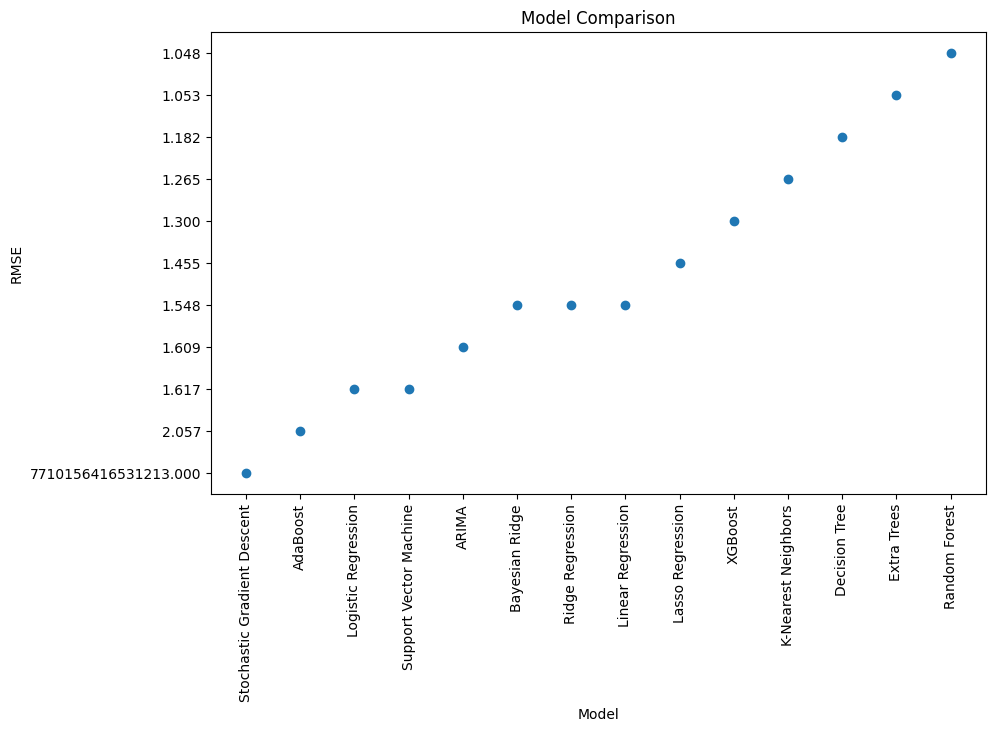

In [103]:
visual_results = results.copy()
visual_results['RMSE'] = visual_results['RMSE'].apply(lambda x: f'{x:.3f}')
visual_results = visual_results.sort_values(by='RMSE', ascending=False)

print(visual_results)

#plot the results
plt.figure(figsize=(10, 6))
plt.scatter(visual_results['Model'], visual_results['RMSE'])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=90)
plt.show()

In [100]:
results.sort_values(by='RMSE', ascending=True, inplace=True)

In [101]:
#print the results in tabel format
print(results)

                          Model          RMSE
3                 Random Forest  1.047522e+00
6                   Extra Trees  1.052919e+00
0                 Decision Tree  1.182239e+00
2           K-Nearest Neighbors  1.265051e+00
7                       XGBoost  1.300267e+00
9              Lasso Regression  1.454596e+00
12               Bayesian Ridge  1.547795e+00
8              Ridge Regression  1.547984e+00
1             Linear Regression  1.547985e+00
10                        ARIMA  1.608982e+00
4           Logistic Regression  1.616978e+00
13       Support Vector Machine  1.616978e+00
11                     AdaBoost  2.056862e+00
5   Stochastic Gradient Descent  7.710156e+15


In [102]:
#print the best model from the results with model name and score
print(f"\nBest Model: {results.iloc[0, 0]}")
print(f"RMSE: {results.iloc[0, 1]:.5f}")


Best Model: Random Forest
RMSE: 1.04752


## Data Visualization

In [71]:
#export the final dataset to csv file
final_dataset.to_csv('./dashboard_dataset.csv', index=False)

In [72]:
#import the final dataset
final_dataset = pd.read_csv('./dashboard_dataset.csv')

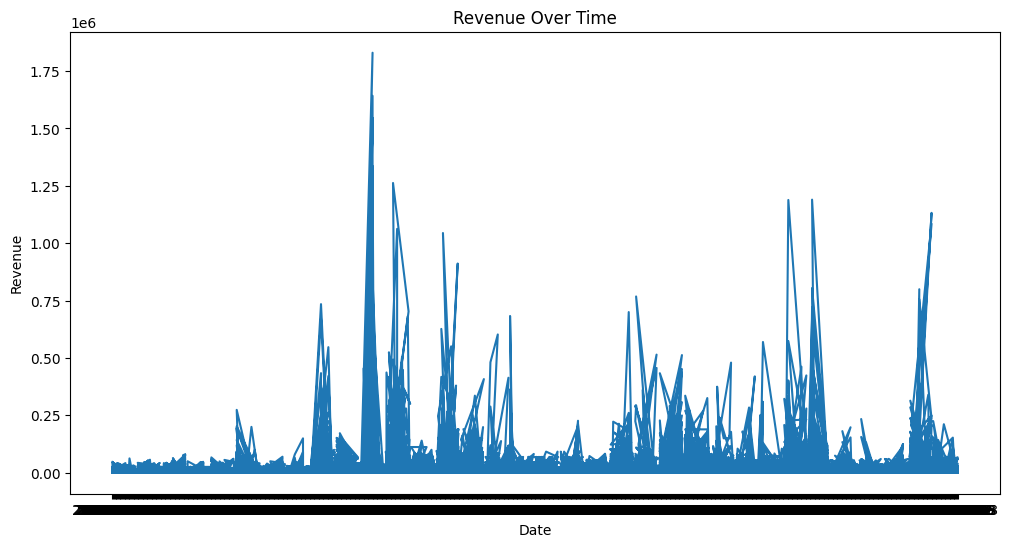

In [73]:
#line chart
plt.figure(figsize=(12, 6))
plt.plot(final_dataset['date'], final_dataset['revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

c:\Users\srume\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


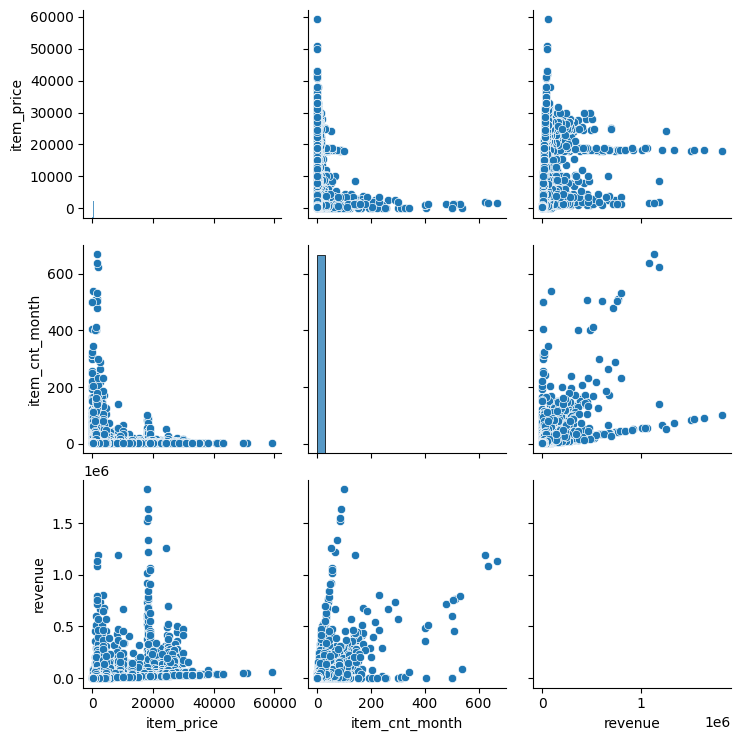

In [74]:
#pairplot
sns.pairplot(final_dataset[['item_price', 'item_cnt_month', 'revenue']])
plt.show()

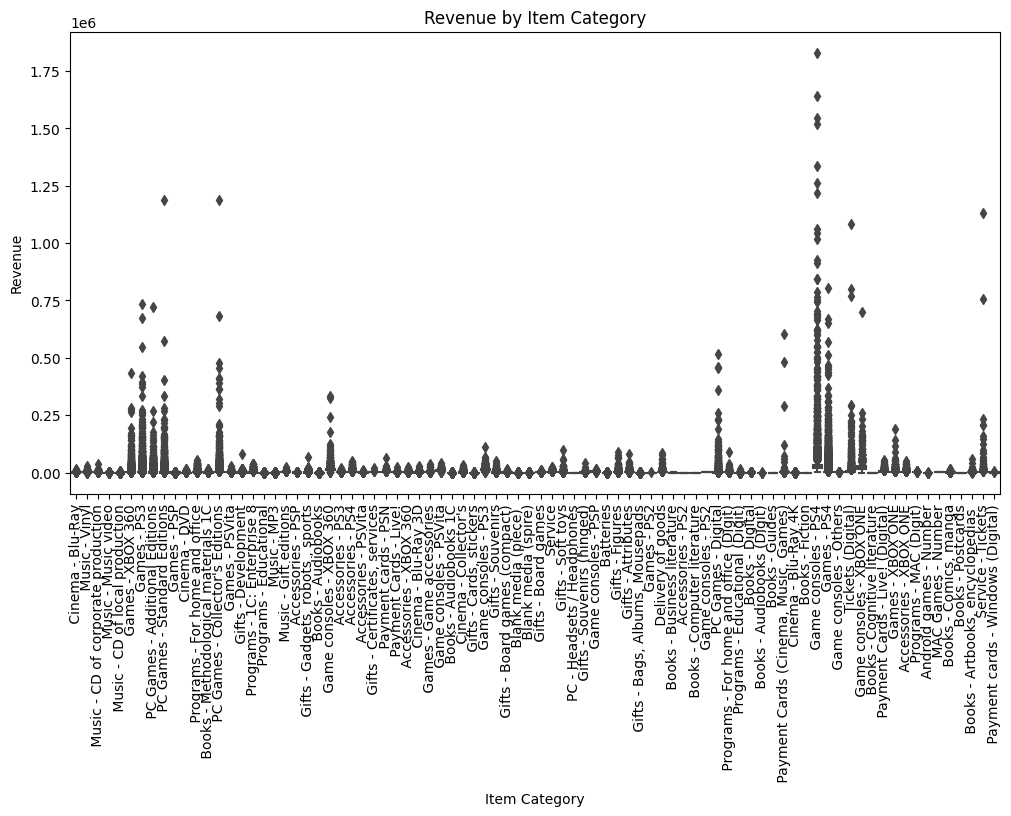

In [75]:
#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_dataset, x='item_category_name', y='revenue')
plt.title('Revenue by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

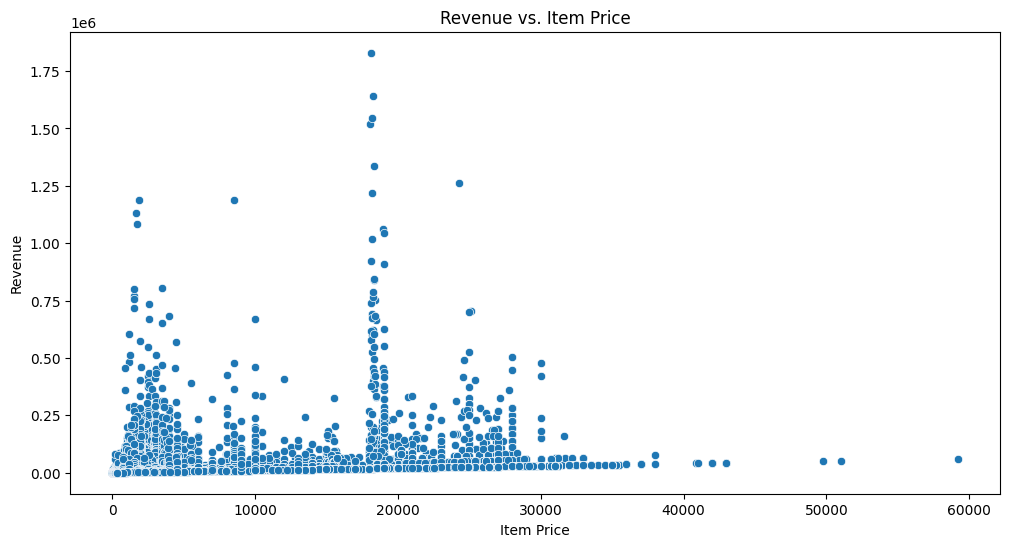

In [76]:
#scatter chart
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_dataset, x='item_price', y='revenue')
plt.title('Revenue vs. Item Price')
plt.xlabel('Item Price')
plt.ylabel('Revenue')
plt.show()

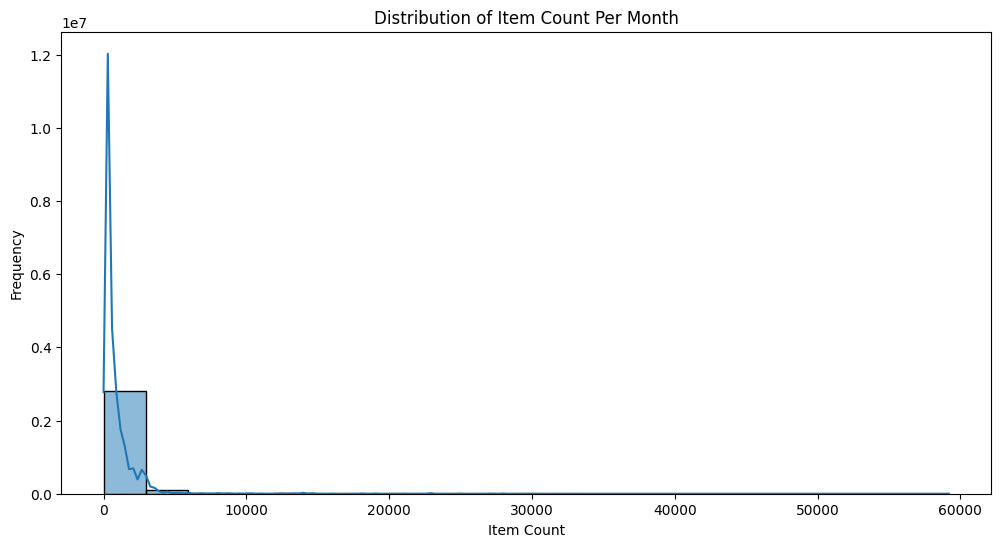

In [77]:
#histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=final_dataset, x='item_price', kde=True, bins=20)
plt.title('Distribution of Item Count Per Month')
plt.xlabel('Item Count')
plt.ylabel('Frequency')
plt.show()

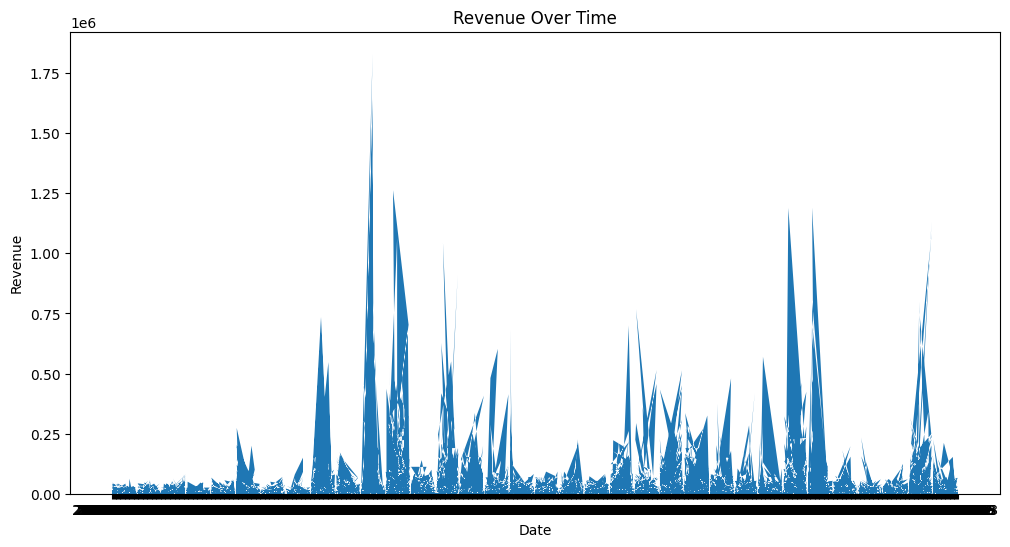

In [78]:
#area plot
plt.figure(figsize=(12, 6))
plt.stackplot(final_dataset['date'], final_dataset['revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

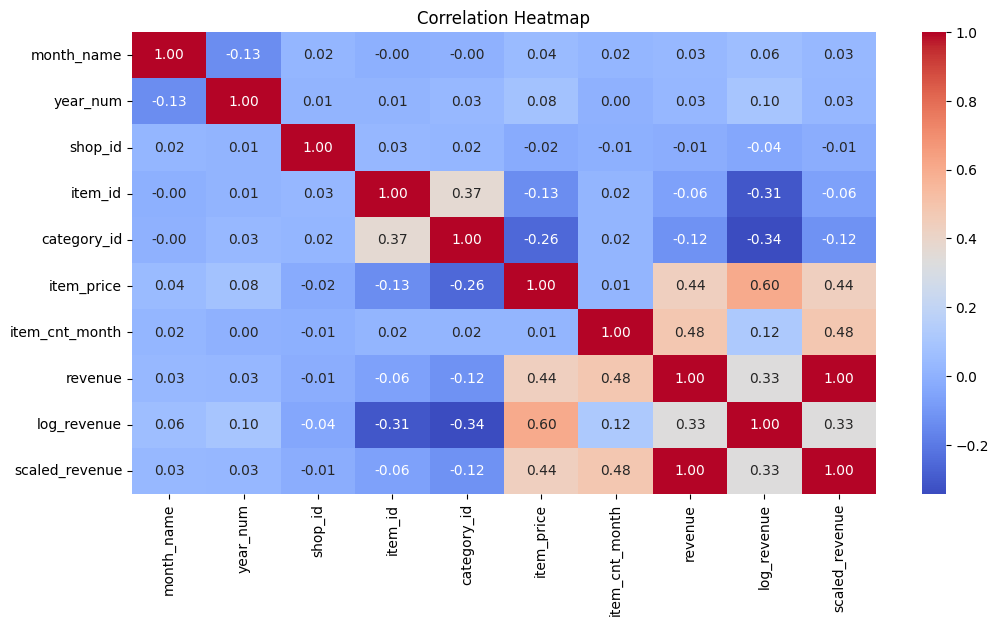

In [79]:
#heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

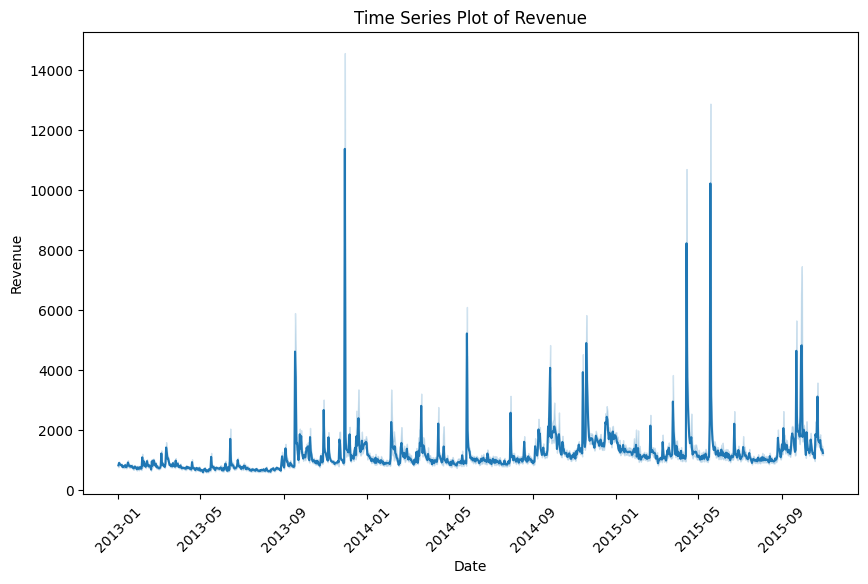

In [80]:
# Time Series Plot
plt.figure(figsize=(10, 6))
final_dataset['date'] = pd.to_datetime(final_dataset['date'])
sns.lineplot(x='date', y='revenue', data=final_dataset)
plt.title('Time Series Plot of Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

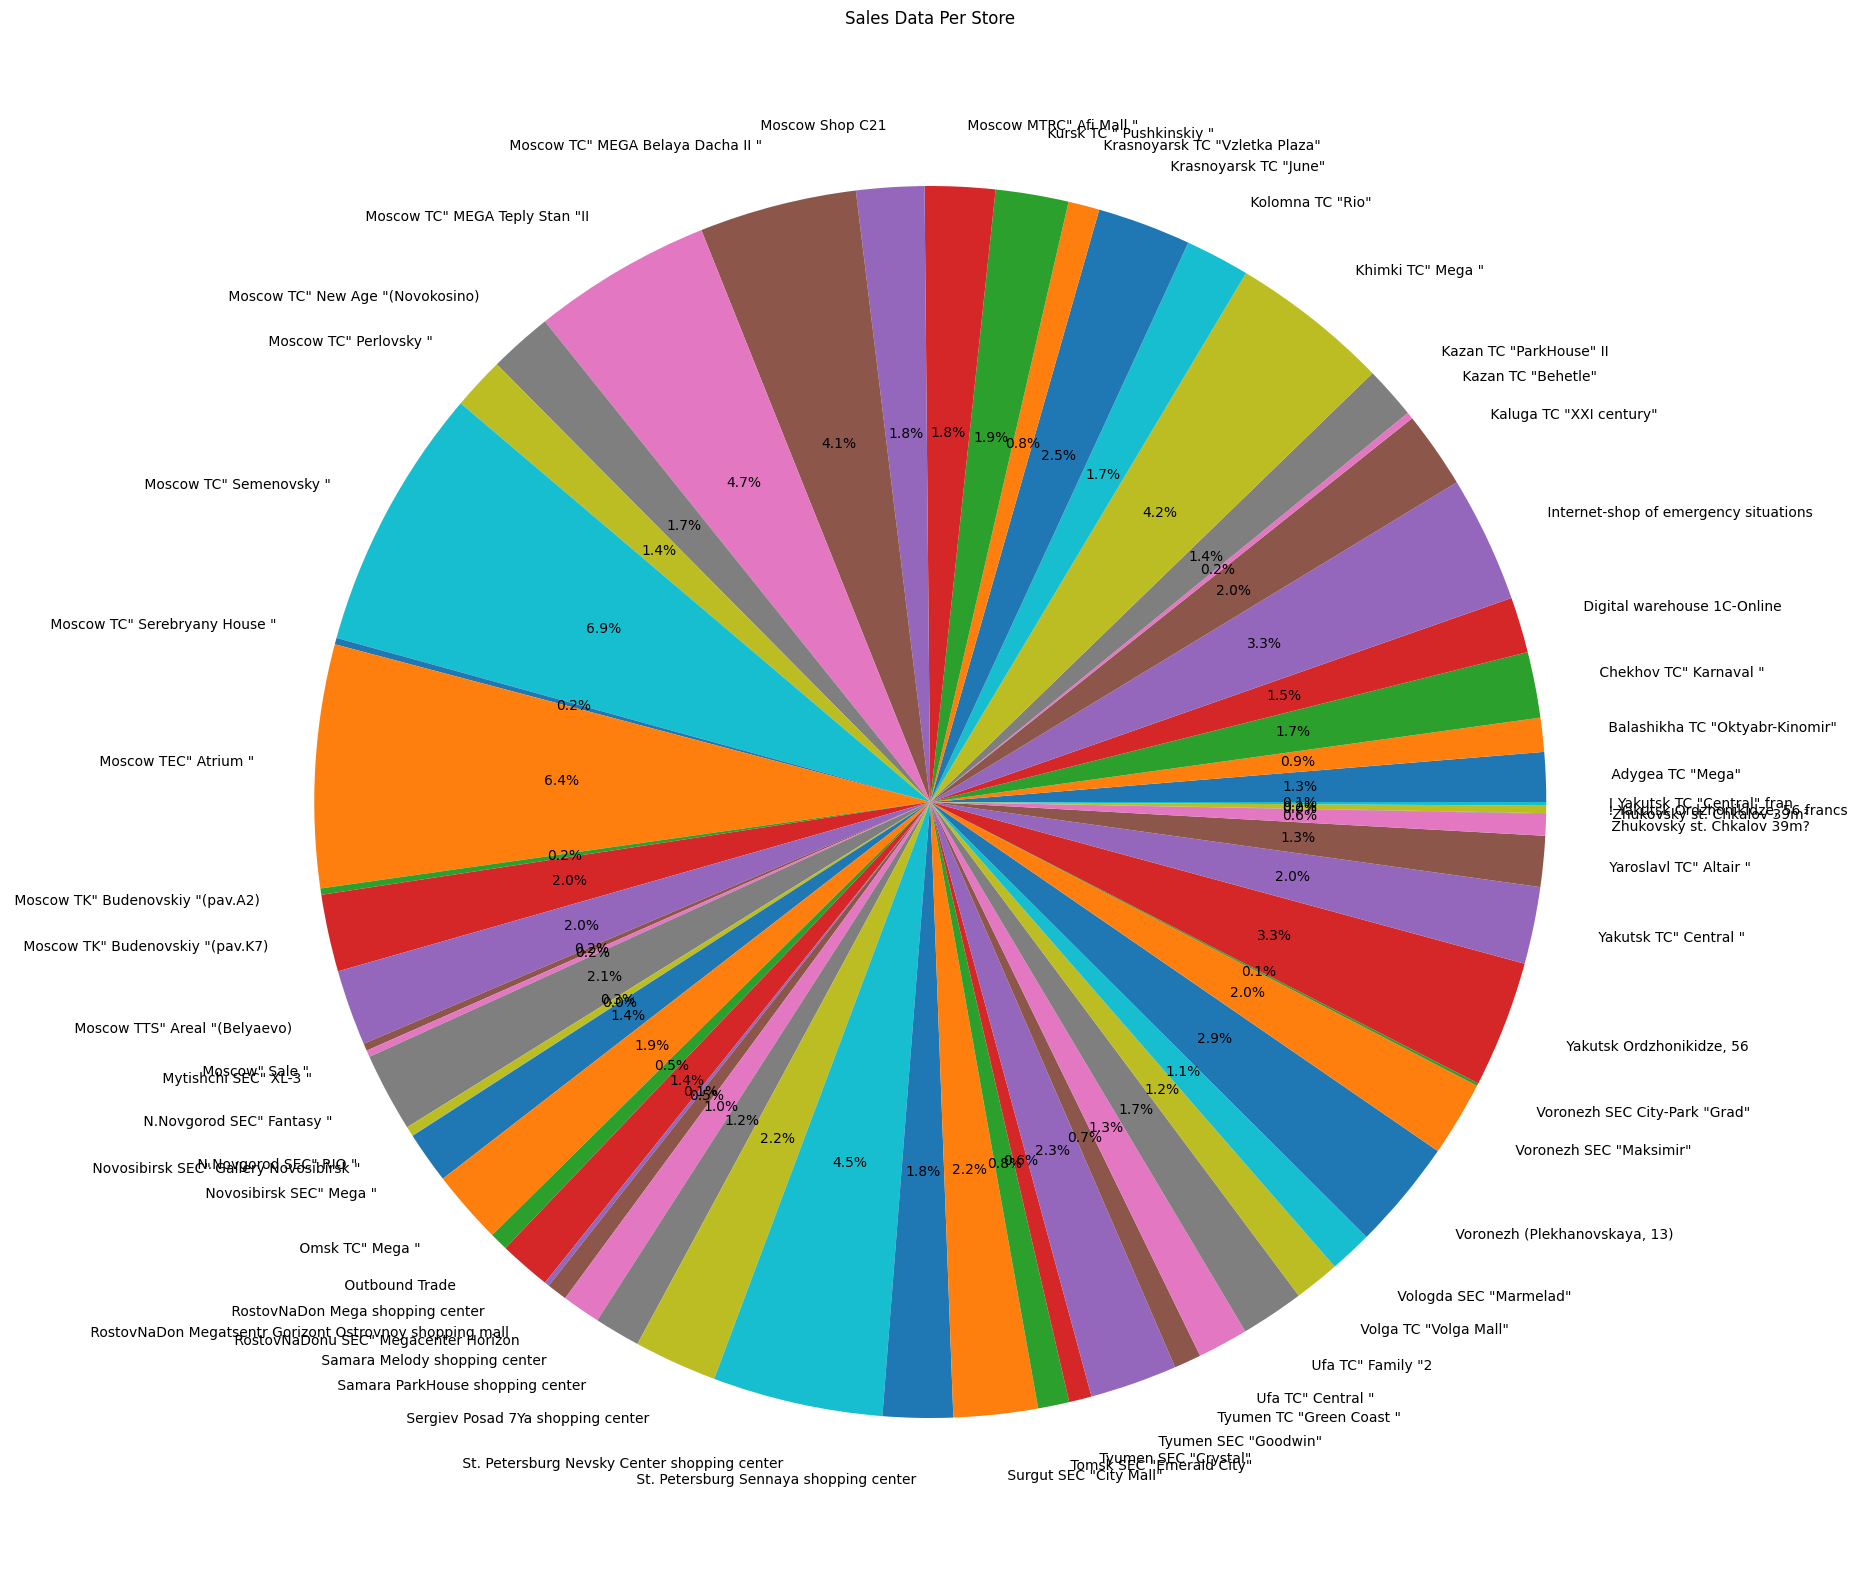

In [81]:
#sales data per store (pie chart)

#group the data by shop_name and sum the revenue column
grouped_by_shop_name = final_dataset.groupby(['shop_name']).agg({'revenue': 'sum'})
plt.figure(figsize=(20, 20))
plt.pie(grouped_by_shop_name['revenue'], labels=grouped_by_shop_name.index, autopct='%1.1f%%')
plt.title('Sales Data Per Store')
plt.show()

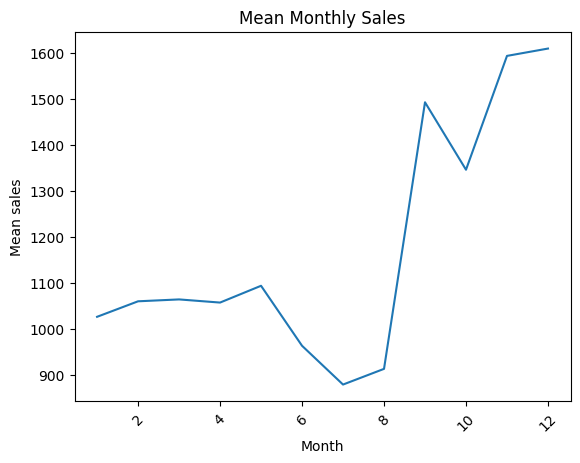

In [82]:
#mean monthly sales
grouped_by_month_name = final_dataset.groupby(['month_name']).agg({'revenue': 'mean'})
sns.lineplot(x=grouped_by_month_name.index, y=grouped_by_month_name['revenue'])
plt.title('Mean Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Mean sales')
plt.xticks(rotation=45)
plt.show()

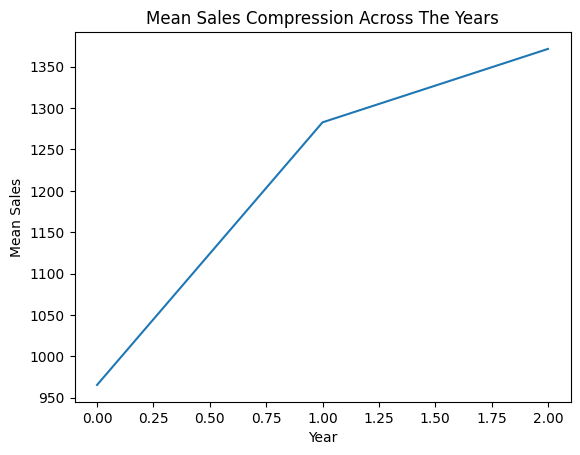

In [83]:
#mean sales compression across the years
grouped_by_year_num = final_dataset.groupby(['year_num']).agg({'revenue': 'mean'})
sns.lineplot(x=grouped_by_year_num.index, y=grouped_by_year_num['revenue'])
plt.title('Mean Sales Compression Across The Years')
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.show()

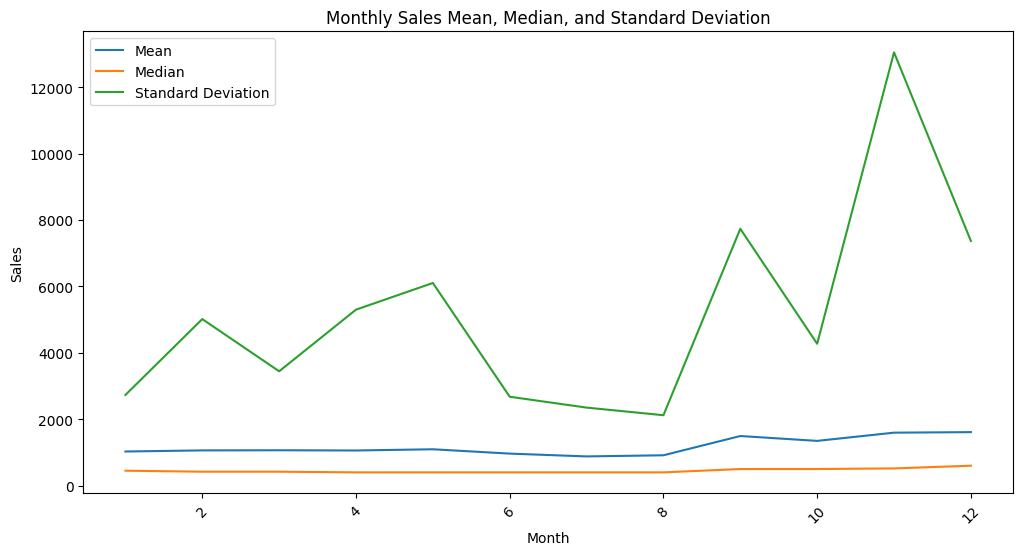

In [84]:
#Montly sales Mean, Median, and Standard Deviation
grouped_by_month_name = final_dataset.groupby(['month_name']).agg({'revenue': ['mean', 'median', 'std']})
plt.figure(figsize=(12, 6))
sns.lineplot(x=grouped_by_month_name.index, y=grouped_by_month_name['revenue']['mean'], label='Mean')
sns.lineplot(x=grouped_by_month_name.index, y=grouped_by_month_name['revenue']['median'], label='Median')
sns.lineplot(x=grouped_by_month_name.index, y=grouped_by_month_name['revenue']['std'], label='Standard Deviation')
plt.title('Monthly Sales Mean, Median, and Standard Deviation')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

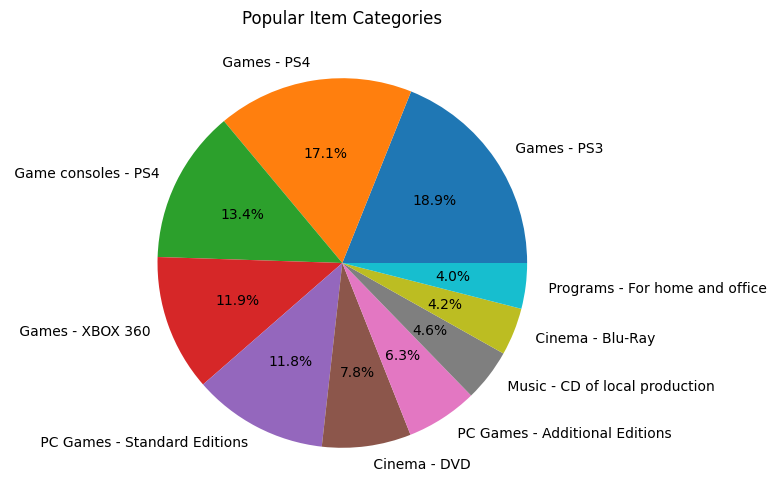

In [85]:
#popular item categories
grouped_by_item_category_name = final_dataset.groupby(['item_category_name']).agg({'revenue': 'sum'})
grouped_by_item_category_name.sort_values(by='revenue', ascending=False, inplace=True)
plt.figure(figsize=(12, 6))
plt.pie(grouped_by_item_category_name['revenue'][:10], labels=grouped_by_item_category_name.index[:10], autopct='%1.1f%%')
plt.title('Popular Item Categories')
plt.show()

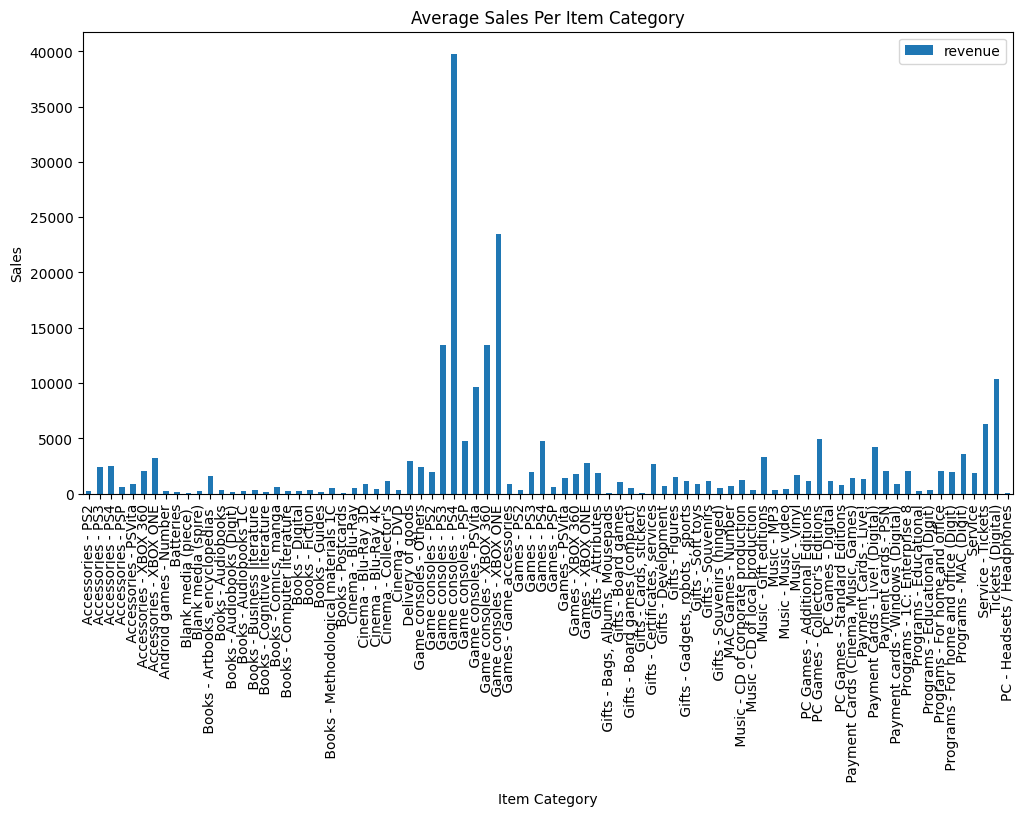

In [86]:
#average sales per item category
grouped_by_item_category_name = final_dataset.groupby(['item_category_name']).agg({'revenue': 'mean'})
grouped_by_item_category_name.plot(kind='bar', figsize=(12, 6))
plt.title('Average Sales Per Item Category')
plt.xlabel('Item Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

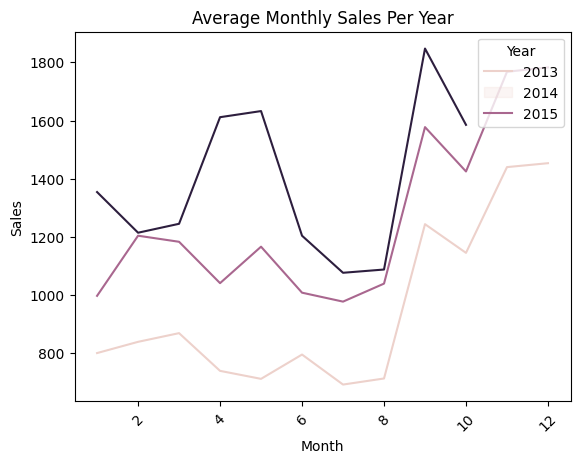

In [87]:
#average monthly sales per year
grouped_by_year_num_and_month_name = final_dataset.groupby(['year_num', 'month_name']).agg({'revenue': 'mean'})
sns.lineplot(data=grouped_by_year_num_and_month_name, x='month_name', y='revenue', hue='year_num')
plt.title('Average Monthly Sales Per Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right', labels=['2013', '2014', '2015'])
plt.show()

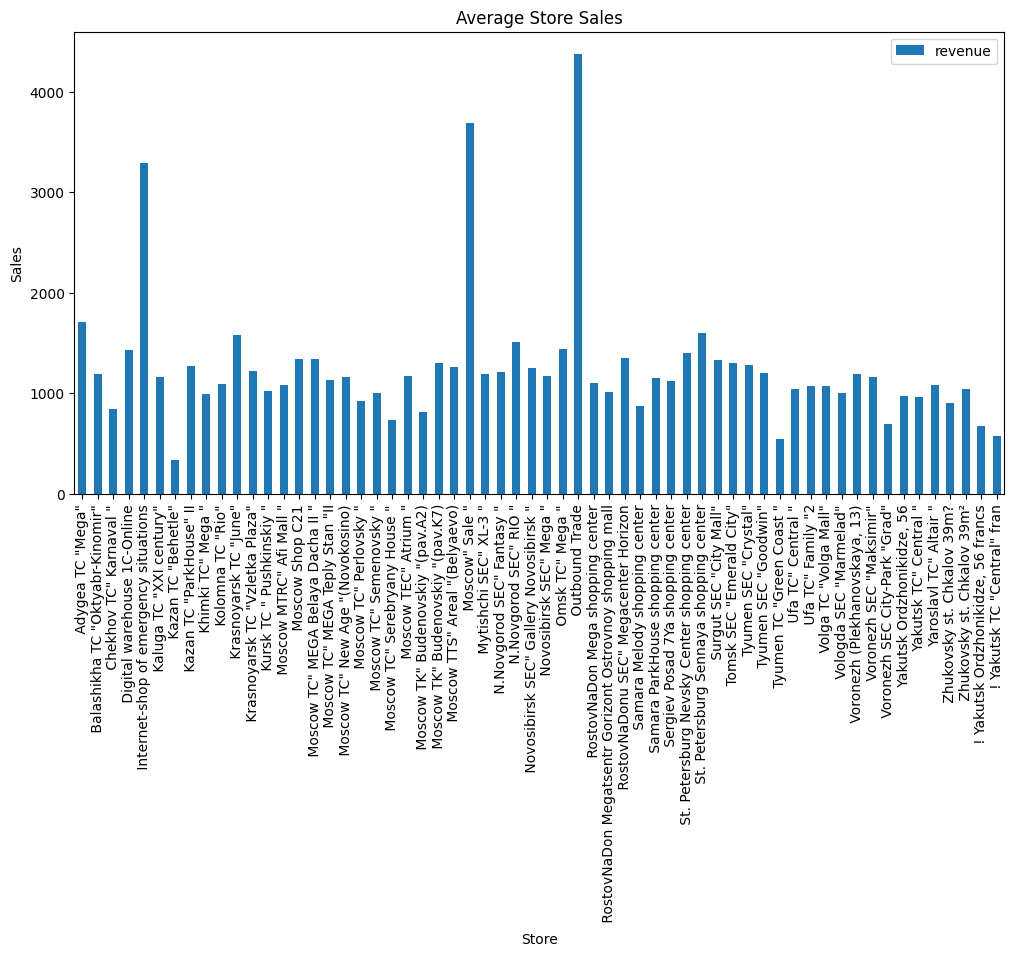

In [88]:
#average store sales
grouped_by_shop_name = final_dataset.groupby(['shop_name']).agg({'revenue': 'mean'})
grouped_by_shop_name.plot(kind='bar', figsize=(12, 6))
plt.title('Average Store Sales')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

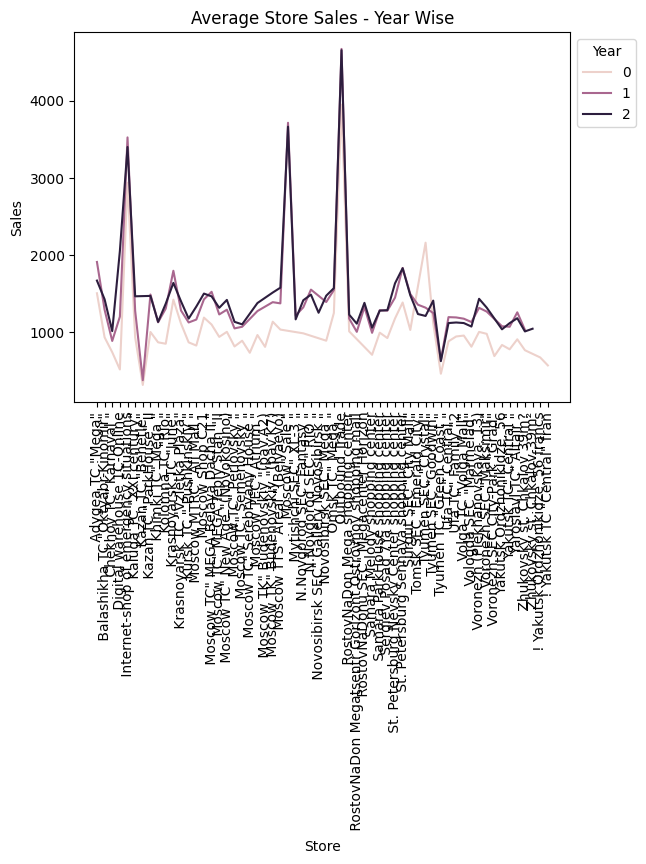

In [89]:
#average store sales - year wise
grouped_by_shop_name_and_year_num = final_dataset.groupby(['shop_name', 'year_num']).agg({'revenue': 'mean'})
sns.lineplot(data=grouped_by_shop_name_and_year_num, markers=True, dashes=False, x='shop_name', y='revenue', hue='year_num')
plt.title('Average Store Sales - Year Wise')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

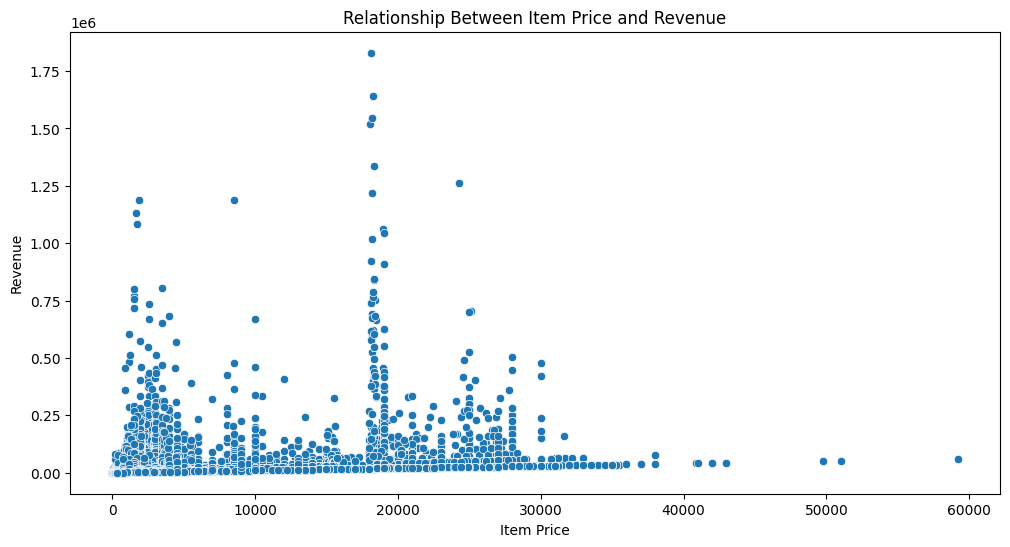

In [90]:
#relationship between item price and revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_dataset, x='item_price', y='revenue')
plt.title('Relationship Between Item Price and Revenue')
plt.xlabel('Item Price')
plt.ylabel('Revenue')
plt.show()

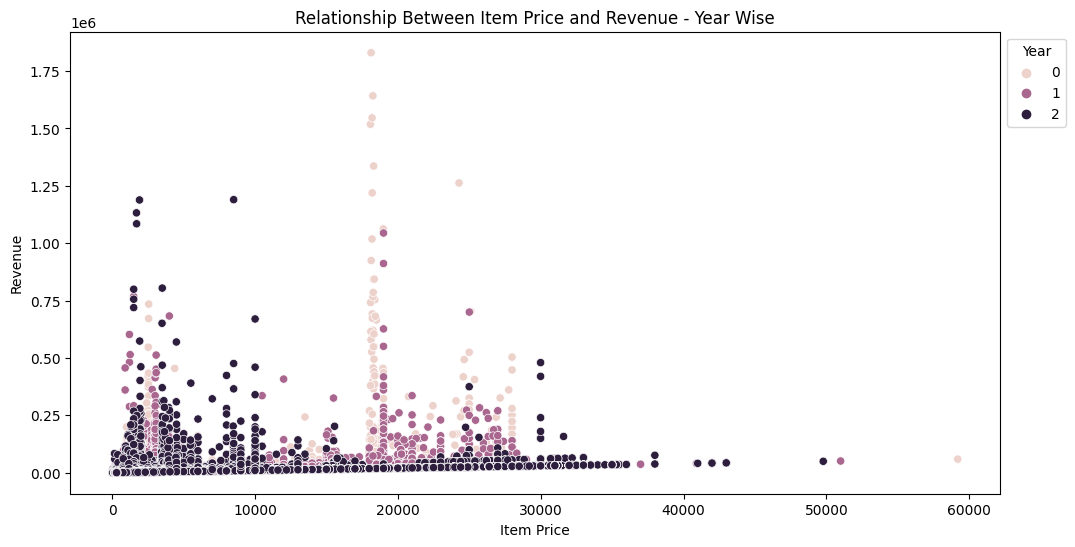

In [91]:
#relationship between item price and revenue - year wise
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_dataset, x='item_price', y='revenue', hue='year_num')
plt.title('Relationship Between Item Price and Revenue - Year Wise')
plt.xlabel('Item Price')
plt.ylabel('Revenue')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

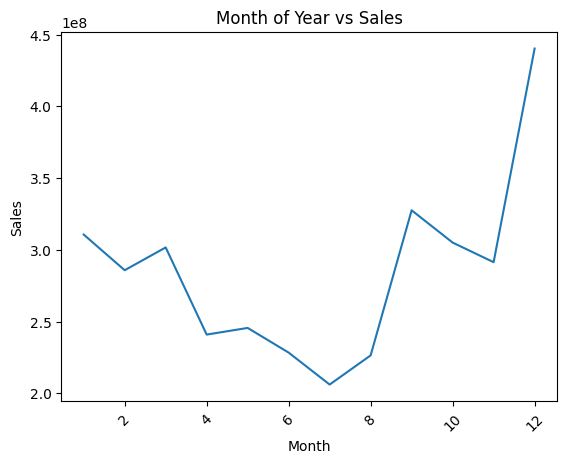

In [92]:
#relationship: month of year vs sales
grouped_by_month_name = final_dataset.groupby(['month_name']).agg({'revenue': 'sum'})
sns.lineplot(x=grouped_by_month_name.index, y=grouped_by_month_name['revenue'])
plt.title('Month of Year vs Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()